# <center> Capstone project - Bike sharing customer behavior <center>

## Table of content
<ul>
<li>Introduction</li>
<li>Study Goals and Research questions</li>
<li>Description of data used and methodology</li>
<li>Data preparation</li>
<li>Data Analysis</li>
    <li>Results and Discussion</li>
    <li>Conclusion</li>
</ul>

## Introduction
Bike sharing is one promising solution to help reduce carbon dioxide footprint and increase public health. In the EU area, bike sharing has been implemented in many countries. Many bike sharing platforms have been introduced to spread the trend and they have proved to be quite successful.
However, bike sharing is not a new model. In China, the model has once been so popular that many issues emerged as the significant growth in the number bike sharing platforms and number of bikes available. For instance, the infrastructure in many big cities was not ready yet for the sudden, but tremendous increase in the number of bikes. There was not enough parking area, bike maintenance services, etc. Consequently, bikes were parked everywhere on the street and negatively affected the urban experience of citizens who did not use public  bikes. Millions of broken bikes were put in bike graveyards without being fixed due to the lack of capability. As such, the effort to promote bike sharing service was a failure in achieving sustainable goals. Also, the above-mentioned issues reflect a tremendous waste in national resources.
I see a need to look at bike sharing activities in order to understand customer behavior. The insights would be useful for the bike sharing platform to better manage their businesses and avoid issues like those that once happened in China. 
## Study goals and research questions
The main goal of this study is to create an initial view on customer behavior in using public bikes via bike sharing platform. This study only focuses on one city in Germany. Before starting to start the analysis, I have some hypotheses:

Bikes are used mostly outdoors. Thus, weather conditions would very likely have an impact on the number of trips made.

Also, weather conditions could influence the duration of each trip.
 
There are multiple ways to use bikes. For instance, in Finland, bikes could be taken from stations and must be returned to stations. However, Germany bikes could be offered at stations or as floating bikes. The question is, would users prefer stations or floating?
 
## Description of data used and methodology
In this study, I will use the bike sharing data of one of the bike sharing platforms in the EU. The data was shared for study purposes and this study only focuses on one city in Germany and in the year 2019. The data considers the duration of the trips, the number of trips made, pick-up and return locations. 
Since one of the research goals is to explore the relationship between weather conditions and bike usage, I collect historical weather data from weatherbit using its free API. 
Foursquare API is also employed to collect data on popular locations in the focused city. This information is important to discover the user behavior pattern in regards to locations.
Linear regression is employed to analyze the relationship between the weather condition and bike usage

## Data Preparation

The data set is provided for study purposes. Also, it has not been heavily processed. Thus, the first task is to clean the data and great meaningful data set to analyze.
Credit to gassnerm, a groupmate who contributed a lot to the cleaning process.

In [1]:
#import the nescessary libraries
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
data_path = 'C:/Users/User/Desktop/frankfurt.csv'
base = pd.read_csv(data_path)

In [3]:
# take all columns to control for na values except p_number contain 0 for bike place
null_columns = np.array(list(filter(lambda x: (str(x) != "p_number"), base.columns)))

print('Collumns that contain null values: ', null_columns)

# drop all rows that contains na values in the columns
base.loc[:, null_columns].dropna(axis=0, subset=null_columns, inplace=True)

Collumns that contain null values:  ['Unnamed: 0' 'p_spot' 'p_place_type' 'datetime' 'b_number' 'trip' 'p_uid'
 'p_bikes' 'p_lat' 'b_bike_type' 'p_name' 'p_lng' 'p_bike']


In [4]:
#the unnamed column is not nescessary, so we can remove this column
base = base.drop(['Unnamed: 0'], axis=1)
base.head(10)

,p_spot,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,b_bike_type,p_name,p_number,p_lng,p_bike
0,True,0,2019-01-20 00:00:00,38240,first,1640,5,50.123068,15,4250 - Friedberger Platz / Café Harveys,4250.0,8.692680,False
1,True,0,2019-01-20 23:59:00,38240,last,1640,5,50.123068,15,4250 - Friedberger Platz / Café Harveys,4250.0,8.692680,False
2,True,0,2019-01-20 00:00:00,38967,first,9843357,5,50.104410,15,4156-Affentorplatz,4156.0,8.690094,False
3,True,0,2019-01-20 23:59:00,38967,last,9843357,5,50.104410,15,4156-Affentorplatz,4156.0,8.690094,False
4,False,12,2019-01-20 00:00:00,38114,first,11809777,1,50.109926,15,BIKE 38114,0.0,8.682334,True
5,False,12,2019-01-20 23:59:00,38114,last,11809777,1,50.109926,15,BIKE 38114,0.0,8.682334,True
6,True,0,2019-01-20 00:00:00,38038,first,122146,5,50.112969,15,4238 - Roßmarkt / Junghofstr. (Goetheplatz),4238.0,8.676619,False
7,True,0,2019-01-20 23:59:00,38038,last,122146,5,50.112969,15,4238 - Roßmarkt / Junghofstr. (Goetheplatz),4238.0,8.676619,False
8,True,0,2019-01-20 13:31:00,38050,first,52745,5,50.115009,15,4247 - Konstabler Wache / Conrad-Elektronik,4247.0,8.687546,False
9,True,0,2019-01-20 23:59:00,38050,last,52745,5,50.115009,15,4247 - Konstabler Wache / Conrad-Elektronik,4247.0,8.687546,False


In [5]:
# parse string series datetime to datetime
base["datetime"] = pd.to_datetime(base["datetime"], format="%Y-%m-%d %H:%M:%S")
base.head()

,p_spot,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,b_bike_type,p_name,p_number,p_lng,p_bike
0,True,0,2019-01-20 00:00:00,38240,first,1640,5,50.123068,15,4250 - Friedberger Platz / Café Harveys,4250.0,8.692680,False
1,True,0,2019-01-20 23:59:00,38240,last,1640,5,50.123068,15,4250 - Friedberger Platz / Café Harveys,4250.0,8.692680,False
2,True,0,2019-01-20 00:00:00,38967,first,9843357,5,50.104410,15,4156-Affentorplatz,4156.0,8.690094,False
3,True,0,2019-01-20 23:59:00,38967,last,9843357,5,50.104410,15,4156-Affentorplatz,4156.0,8.690094,False
4,False,12,2019-01-20 00:00:00,38114,first,11809777,1,50.109926,15,BIKE 38114,0.0,8.682334,True


In [6]:
# read all data that contains trips from data set drop all first and last rows
base_trips = base[(base["trip"].str.contains("(start|end)"))]

base["p_number"].value_counts()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0.0       136930
4240.0     12755
4247.0     10304
4245.0      6987
4221.0      6626
           ...  
4202.0       499
4139.0       384
4207.0       378
4232.0       278
4169.0        88
Name: p_number, Length: 119, dtype: int64

In [7]:
base_trips.head()

,p_spot,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,b_bike_type,p_name,p_number,p_lng,p_bike
23,True,0,2019-01-20 20:37:00,38431,start,7644,5,50.122683,15,4259 - Leipziger Str. / Markgrafenstr.,4259.0,8.645521,False
24,True,0,2019-01-20 20:44:00,38431,end,9343020,1,50.117540,15,4182 - Schloßstraße / Robert-Mayer-Straße,4182.0,8.645430,False
59,True,0,2019-01-20 13:54:00,38324,start,121963,2,50.128915,15,4252 - Nibelungenplatz / Friedberger Landstr.,4252.0,8.692439,False
60,True,0,2019-01-20 14:03:00,38324,end,52745,5,50.115009,15,4247 - Konstabler Wache / Conrad-Elektronik,4247.0,8.687546,False
61,True,0,2019-01-20 14:16:00,38324,start,52745,5,50.115009,15,4247 - Konstabler Wache / Conrad-Elektronik,4247.0,8.687546,False


Since there is an error with the data that some has 2 starts but only one end. Thus, I filter the double starts and doubdle ends

In [8]:
base_trips = pd.DataFrame(base_trips.sort_values(by=['b_number', 'datetime']), index=None).reset_index()

# drop index column
base_trips.drop(["index"], axis=1, inplace=True)

# Find the start and end bookings in data set
start_rows = base_trips[list(map(lambda x: base_trips.loc[x]["trip"] == "start", base_trips.index))]
end_rows = base_trips[list(map(lambda x: base_trips.loc[x]["trip"] == "end", base_trips.index))]

In [9]:
# Filter double starts or ends for same bike
wrong_starts = pd.Series(list(filter(lambda x: False if (x == 0) else base_trips.loc[int(x-1)]["trip"] == "start",
                                         start_rows.index)))

wrong_ends = pd.Series(list(filter(lambda y: False if (y == end_rows.index[-1]) else base_trips.loc[int(y+1)]["trip"] == "end",
                                       end_rows.index)))

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [10]:
# Append Index to delete to one list
if wrong_ends.empty:
    wrong_series = pd.Series(wrong_starts)
else:
    wrong_series = pd.Series(wrong_starts.append(wrong_ends))
    print(wrong_starts)

In [11]:
# drop redundant id start and reset index to get right index shift
base_trips.drop(wrong_series, axis=0, inplace=True)
base_trips.reset_index(inplace=True)
base_trips.drop("index", axis=1, inplace=True)

# created new rows for start because of reindexing
start_rows_new = base_trips[list(map(lambda x: base_trips.loc[x]["trip"] == "start", base_trips.index))]
end_rows_new = base_trips[list(map(lambda y: base_trips.loc[y]["trip"] == "end", base_trips.index))]

print(start_rows_new, end_rows_new)

# Select every start that has a end booking in data (data set already sort with bike number and datetime)
starts_has_end = list(filter(lambda x: base_trips.loc[x + 1]["trip"] == "end", start_rows_new.index))

# created temp df
start_trips = base_trips.iloc[starts_has_end]

# calculate duration
durations = list(map(lambda x: end_rows_new.iloc[x]["datetime"] - start_rows_new.iloc[x]["datetime"],
                         range(0, len(start_rows_new))))

# create the new data frame for analysis, rename columns added new columns
trip_wduration = pd.DataFrame(start_trips.rename(columns={"b_number": "Bike_number", "p_lat": "Start_Latitude",
                                                              "p_lng": "Start_Longitude", "p_spot": "Station_position",
                                                              "datetime": "Starttime", "p_place_type": "Type_of_Place",
                                                              "p_spot": "Station_position", "p_bike": "Bike_position",
                                                              "p_number": "Station_number",
                                                              "p_uid": "Start_position_UID",
                                                              "p_bikes": "Bikes_on_position",
                                                              "b_bike_type": "Bikes_type"}))

# Calculate if booking is on weekday
print(trip_wduration)
weekday = list(map(lambda x: trip_wduration.loc[x]["Starttime"].weekday() < 5, trip_wduration.index))

trip_wduration.drop(["trip", "p_name"], axis=1, inplace=True)
trip_wduration["duration"] = durations
trip_wduration["weekday"] = weekday
trip_wduration["Bike_number"] = start_trips["b_number"]

trip_wduration["Endtime"] = trip_wduration["Starttime"] + (pd.to_timedelta(trip_wduration["duration"]))
trip_wduration["End_position_UID"] = pd.Series(index=trip_wduration.index, data=end_rows_new["p_uid"].values)
trip_wduration["End_Latitude"] = pd.Series(index=trip_wduration.index, data=end_rows_new["p_lat"].values)
trip_wduration["End_Longitude"] = pd.Series(index=trip_wduration.index, data=end_rows_new["p_lng"].values)

        p_spot  p_place_type            datetime  b_number   trip     p_uid  \
0        False            12 2019-09-28 13:01:00      6208  start   2990488   
2        False            12 2019-09-29 10:56:00      6208  start   2990488   
4         True             0 2019-10-04 08:07:00      6208  start    121962   
6         True             0 2019-10-04 23:19:00      6208  start    121962   
8         True             0 2019-10-05 23:21:00      6208  start    121962   
...        ...           ...                 ...       ...    ...       ...   
308710   False            12 2019-05-07 09:36:00     91229  start  15425765   
308712   False            12 2019-05-07 12:00:00     91229  start  15435639   
308714   False            12 2019-05-07 14:04:00     91229  start  15441152   
308716   False            12 2019-05-07 19:54:00     91229  start  15446868   
308718   False            12 2019-05-08 04:17:00     91229  start  15469138   

        p_bikes      p_lat  b_bike_type            

According to the operator, if the bike is activated by accident, the system will automatically turn it off after 3 minutes if the bike is not moving. Therefore, I remove the trips with duration less than 3 minutes and the start location matches the end location.

In [12]:
# method to perform cleaning data frame from wrong data.
def drop_short_trips(df):

    df = pd.DataFrame(df)
    short_trip = df[(df["duration"] <= dt.timedelta(minutes=3)) & (df["End_position_UID"] == df["Start_position_UID"])]
    # drop short values from data frame
    df.drop(short_trip.index, inplace=True)
# drop trips that are shorter or 3 minutes long and did n change location
drop_short_trips(trip_wduration)


In [13]:
#reset index after cleaning the dataset
trip_wduration.reset_index(inplace=True)

In [14]:
#create 2 new columns from date time: year and month
trip_wduration['Starttime'] = pd.to_datetime(trip_wduration['Starttime'])
trip_wduration['year'], trip_wduration['month'] = trip_wduration['Starttime'].dt.year, trip_wduration['Starttime'].dt.month
trip_wduration.head()

,index,Station_position,Type_of_Place,Starttime,Bike_number,Start_position_UID,Bikes_on_position,Start_Latitude,Bikes_type,Station_number,Start_Longitude,Bike_position,duration,weekday,Endtime,End_position_UID,End_Latitude,End_Longitude,year,month
0,0,False,12,2019-09-28 13:01:00,6208,2990488,0,50.107197,5,0.0,8.662867,True,00:03:00,False,2019-09-28 13:04:00,2990488,50.107197,8.662867,2019,9
1,2,False,12,2019-09-29 10:56:00,6208,2990488,0,50.107197,5,0.0,8.662867,True,00:07:00,False,2019-09-29 11:03:00,2990488,50.107197,8.662867,2019,9
2,4,True,0,2019-10-04 08:07:00,6208,121962,5,50.107599,5,4240.0,8.664168,False,00:03:00,True,2019-10-04 08:10:00,121962,50.107599,8.664168,2019,10
3,6,True,0,2019-10-04 23:19:00,6208,121962,7,50.107599,5,4240.0,8.664168,False,00:03:00,True,2019-10-04 23:22:00,121962,50.107599,8.664168,2019,10
4,8,True,0,2019-10-05 23:21:00,6208,121962,13,50.107599,5,4240.0,8.664168,False,00:07:00,False,2019-10-05 23:28:00,121962,50.107599,8.664168,2019,10


In [15]:
#drop the index column
trip_wduration.drop('index', axis = 1, inplace = True)
trip_wduration.tail()

,Station_position,Type_of_Place,Starttime,Bike_number,Start_position_UID,Bikes_on_position,Start_Latitude,Bikes_type,Station_number,Start_Longitude,Bike_position,duration,weekday,Endtime,End_position_UID,End_Latitude,End_Longitude,year,month
154355,False,12,2019-05-07 09:36:00,91229,15425765,1,50.585947,71,0.0,8.683895,True,02:12:00,True,2019-05-07 11:48:00,15435639,50.583418,8.673678,2019,5
154356,False,12,2019-05-07 12:00:00,91229,15435639,1,50.583418,71,0.0,8.673678,True,00:11:00,True,2019-05-07 12:11:00,15441152,50.573378,8.700063,2019,5
154357,False,12,2019-05-07 14:04:00,91229,15441152,1,50.572982,71,0.0,8.700078,True,00:16:00,True,2019-05-07 14:20:00,15446868,50.580484,8.664531,2019,5
154358,False,12,2019-05-07 19:54:00,91229,15446868,1,50.580916,71,0.0,8.664705,True,00:10:00,True,2019-05-07 20:04:00,15462432,50.582658,8.680114,2019,5
154359,False,12,2019-05-08 04:17:00,91229,15469138,1,50.583764,71,0.0,8.680127,True,00:08:00,True,2019-05-08 04:25:00,15470590,50.575929,8.693904,2019,5


In [16]:
#check the data set to see if the year column is needed
trip_wduration['year'].value_counts()

2019    154360
Name: year, dtype: int64

In [17]:
#as the data set is for 2019, there is no wrong data, so we can drop the 'year' column
trip_wduration = trip_wduration.drop(['year'], axis=1)
trip_wduration.tail()

,Station_position,Type_of_Place,Starttime,Bike_number,Start_position_UID,Bikes_on_position,Start_Latitude,Bikes_type,Station_number,Start_Longitude,Bike_position,duration,weekday,Endtime,End_position_UID,End_Latitude,End_Longitude,month
154355,False,12,2019-05-07 09:36:00,91229,15425765,1,50.585947,71,0.0,8.683895,True,02:12:00,True,2019-05-07 11:48:00,15435639,50.583418,8.673678,5
154356,False,12,2019-05-07 12:00:00,91229,15435639,1,50.583418,71,0.0,8.673678,True,00:11:00,True,2019-05-07 12:11:00,15441152,50.573378,8.700063,5
154357,False,12,2019-05-07 14:04:00,91229,15441152,1,50.572982,71,0.0,8.700078,True,00:16:00,True,2019-05-07 14:20:00,15446868,50.580484,8.664531,5
154358,False,12,2019-05-07 19:54:00,91229,15446868,1,50.580916,71,0.0,8.664705,True,00:10:00,True,2019-05-07 20:04:00,15462432,50.582658,8.680114,5
154359,False,12,2019-05-08 04:17:00,91229,15469138,1,50.583764,71,0.0,8.680127,True,00:08:00,True,2019-05-08 04:25:00,15470590,50.575929,8.693904,5


In [18]:
#create 2 new columns for the duration in second and in minute
trip_wduration['duration_in_s'] = trip_wduration['duration'] / np.timedelta64(1, 's')
trip_wduration['duration_in_m'] = trip_wduration['duration'] / np.timedelta64(1, 'm')
trip_wduration.tail()

,Station_position,Type_of_Place,Starttime,Bike_number,Start_position_UID,Bikes_on_position,Start_Latitude,Bikes_type,Station_number,Start_Longitude,Bike_position,duration,weekday,Endtime,End_position_UID,End_Latitude,End_Longitude,month,duration_in_s,duration_in_m
154355,False,12,2019-05-07 09:36:00,91229,15425765,1,50.585947,71,0.0,8.683895,True,02:12:00,True,2019-05-07 11:48:00,15435639,50.583418,8.673678,5,7920.0,132.0
154356,False,12,2019-05-07 12:00:00,91229,15435639,1,50.583418,71,0.0,8.673678,True,00:11:00,True,2019-05-07 12:11:00,15441152,50.573378,8.700063,5,660.0,11.0
154357,False,12,2019-05-07 14:04:00,91229,15441152,1,50.572982,71,0.0,8.700078,True,00:16:00,True,2019-05-07 14:20:00,15446868,50.580484,8.664531,5,960.0,16.0
154358,False,12,2019-05-07 19:54:00,91229,15446868,1,50.580916,71,0.0,8.664705,True,00:10:00,True,2019-05-07 20:04:00,15462432,50.582658,8.680114,5,600.0,10.0
154359,False,12,2019-05-08 04:17:00,91229,15469138,1,50.583764,71,0.0,8.680127,True,00:08:00,True,2019-05-08 04:25:00,15470590,50.575929,8.693904,5,480.0,8.0


In [19]:
#check the value of the duration in minute to see if there is any wrong data or outliners
print(trip_wduration['duration_in_m'].describe())
print(trip_wduration['duration_in_m'].value_counts(bins = 10))

count    154360.000000
mean         21.675155
std          67.974868
min           2.000000
25%           2.000000
50%           5.000000
75%          13.000000
max        1394.000000
Name: duration_in_m, dtype: float64
(0.607, 141.2]      149387
(141.2, 280.4]        2404
(280.4, 419.6]        1408
(419.6, 558.8]         576
(558.8, 698.0]         356
(698.0, 837.2]         135
(837.2, 976.4]          53
(976.4, 1115.6]         24
(1115.6, 1254.8]        10
(1254.8, 1394.0]         7
Name: duration_in_m, dtype: int64


In [20]:
#create a new data frame for trips less than 1.5 hours
trip_wduration_short1 = trip_wduration.drop(trip_wduration[trip_wduration['duration_in_m']>90].index)
trip_wduration_short1.tail()

,Station_position,Type_of_Place,Starttime,Bike_number,Start_position_UID,Bikes_on_position,Start_Latitude,Bikes_type,Station_number,Start_Longitude,Bike_position,duration,weekday,Endtime,End_position_UID,End_Latitude,End_Longitude,month,duration_in_s,duration_in_m
154354,False,12,2019-05-06 17:56:00,91229,15413606,1,50.580409,71,0.0,8.664609,True,00:09:00,True,2019-05-06 18:05:00,15414676,50.586084,8.683803,5,540.0,9.0
154356,False,12,2019-05-07 12:00:00,91229,15435639,1,50.583418,71,0.0,8.673678,True,00:11:00,True,2019-05-07 12:11:00,15441152,50.573378,8.700063,5,660.0,11.0
154357,False,12,2019-05-07 14:04:00,91229,15441152,1,50.572982,71,0.0,8.700078,True,00:16:00,True,2019-05-07 14:20:00,15446868,50.580484,8.664531,5,960.0,16.0
154358,False,12,2019-05-07 19:54:00,91229,15446868,1,50.580916,71,0.0,8.664705,True,00:10:00,True,2019-05-07 20:04:00,15462432,50.582658,8.680114,5,600.0,10.0
154359,False,12,2019-05-08 04:17:00,91229,15469138,1,50.583764,71,0.0,8.680127,True,00:08:00,True,2019-05-08 04:25:00,15470590,50.575929,8.693904,5,480.0,8.0


In [21]:
print(trip_wduration_short1['duration_in_m'].describe())
print(trip_wduration_short1['duration_in_m'].value_counts(bins = 10))

count    147233.000000
mean          9.745071
std          13.184823
min           2.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          90.000000
Name: duration_in_m, dtype: float64
(1.911, 10.8]    107609
(10.8, 19.6]      19893
(19.6, 28.4]       8740
(28.4, 37.2]       3957
(37.2, 46.0]       2169
(46.0, 54.8]       1447
(54.8, 63.6]       1343
(63.6, 72.4]        826
(72.4, 81.2]        672
(81.2, 90.0]        577
Name: duration_in_m, dtype: int64


In [22]:
#to make it easier to continue analzing the data, I save the data frame to CSV 
compression_opts = dict(method='zip', archive_name='trip_wduration.csv')  
trip_wduration.to_csv('trip_wdutation.zip', index=False, compression=compression_opts)

In [117]:
trip_wduration.shape

(154360, 22)

## Methodology and Data Analysis

In [23]:
#import libraries to visualize
import matplotlib as mpl
import matplotlib.pyplot as plt

As the purpose of the study is to explore the relationship between number of trips, duration of the trips and weather conditions, I need to extract historical weather data. Weatherbit has free API to extract data. Therefore, I use this API to get the data

In [27]:
pip install pyweatherbit

Note: you may need to restart the kernel to use updated packages.


In [28]:
#Import the nescessary to get the weather data
from weatherbit.api import Api
import pandas as pd
from datetime import timedelta

api_key = 'your key'
lat = 50.107254 #location of the city
lon = 8.685223  #location of the city

api = Api(api_key)

In [29]:
#create a new object and get the information via api
forecast = api.get_forecast(lat=lat, lon=lon)

In [30]:
# Set the date from 1 Jand to 31 Dec and get the data from API
dates = pd.date_range(start='20190101', end='20191231', freq='D')
df_dates = pd.DataFrame(dates, columns=['start'])
df_dates['end'] = df_dates.shift(-1)
dates = df_dates.values

In [31]:
# Get the weather historical data for weather
#create the empty list to store data
temp_list = []
for st, en in dates[:-1]:
    start = (st.astype(str)[0:10])
    end = (en.astype(str)[0:10])
    api.set_granularity('daily')
    data = api.get_history(
        lat=lat, lon=lon, start_date=start, end_date=end)
    temp_list.append(data)

#Create empty lists to store the data
#I will need temperature, humidity for my analysis, so I will actract only these 2 data from via API
temp_lst = []
humidity_lst = []
for h in temp_list:
    temp = h.get_series(['temp'])
    humidity = h.get_series(['rh'])
    temp_lst += temp
    humidity_lst += humidity

pd_temp = pd.DataFrame(temp_lst)
pd_humid = pd.DataFrame(humidity_lst)

#merge 2 data frame by datetime to have one new df for weather data
df_we_year = pd_temp.merge(pd_humid, on='datetime')

df_we_year.to_pickle('weather_daily.pkl')

df_we_year.head()

,temp,datetime,rh
0,6.7,2019-01-01,89.0
1,3.6,2019-01-02,70.3
2,1.0,2019-01-03,85.0
3,1.6,2019-01-04,91.1
4,5.7,2019-01-05,87.9


In [32]:
df_we_year['month'] = df_we_year['datetime'].dt.month
df_we_year.tail()

,temp,datetime,rh,month
359,4.6,2019-12-26,91.9,12
360,4.9,2019-12-27,87.2,12
361,0.9,2019-12-28,84.6,12
362,-0.5,2019-12-29,84.1,12
363,-0.9,2019-12-30,87.3,12


In [33]:
#as the dataset for bike trips does not have July, drop weather data for July too.
df_we = df_we_year.set_index('month').loc[[1,2,3,4,5,6,8,9,10,11,12],['temp','datetime','rh']]
df_we.tail()

,temp,datetime,rh
month,,,
12,4.6,2019-12-26,91.9
12,4.9,2019-12-27,87.2
12,0.9,2019-12-28,84.6
12,-0.5,2019-12-29,84.1
12,-0.9,2019-12-30,87.3


In [34]:
df_we.reset_index(inplace=True)
df_we.tail()

,month,temp,datetime,rh
328,12,4.6,2019-12-26,91.9
329,12,4.9,2019-12-27,87.2
330,12,0.9,2019-12-28,84.6
331,12,-0.5,2019-12-29,84.1
332,12,-0.9,2019-12-30,87.3


In [35]:
#create a new column with the date of month value
trip_wduration['date_of_month'] = trip_wduration['Starttime'].dt.date
trip_wduration.tail()

,Station_position,Type_of_Place,Starttime,Bike_number,Start_position_UID,Bikes_on_position,Start_Latitude,Bikes_type,Station_number,Start_Longitude,...,duration,weekday,Endtime,End_position_UID,End_Latitude,End_Longitude,month,duration_in_s,duration_in_m,date_of_month
154355,False,12,2019-05-07 09:36:00,91229,15425765,1,50.585947,71,0.0,8.683895,...,02:12:00,True,2019-05-07 11:48:00,15435639,50.583418,8.673678,5,7920.0,132.0,2019-05-07
154356,False,12,2019-05-07 12:00:00,91229,15435639,1,50.583418,71,0.0,8.673678,...,00:11:00,True,2019-05-07 12:11:00,15441152,50.573378,8.700063,5,660.0,11.0,2019-05-07
154357,False,12,2019-05-07 14:04:00,91229,15441152,1,50.572982,71,0.0,8.700078,...,00:16:00,True,2019-05-07 14:20:00,15446868,50.580484,8.664531,5,960.0,16.0,2019-05-07
154358,False,12,2019-05-07 19:54:00,91229,15446868,1,50.580916,71,0.0,8.664705,...,00:10:00,True,2019-05-07 20:04:00,15462432,50.582658,8.680114,5,600.0,10.0,2019-05-07
154359,False,12,2019-05-08 04:17:00,91229,15469138,1,50.583764,71,0.0,8.680127,...,00:08:00,True,2019-05-08 04:25:00,15470590,50.575929,8.693904,5,480.0,8.0,2019-05-08


In [36]:
#Create a new column for the average duration of trips by date of the month using groupby.
#Store the data in a new dataframe
trip_duration_avg = pd.DataFrame(trip_wduration[['date_of_month','duration_in_m',]].groupby(['date_of_month']).mean().reset_index().values.tolist(), columns = ['date','avg_duration'])
trip_duration_avg.tail()

,date,avg_duration
307,2019-12-27,23.442308
308,2019-12-28,4.642981
309,2019-12-29,5.961749
310,2019-12-30,26.375000
311,2019-12-31,15.456790


In [37]:
#In order to count the number of trips, I create a new column named 'count', each row has count = 1.
#using the groupby and sum function, I create a new dataframe with the number of trips for each date.
trip_wduration['count'] = 1
trip_by_day = pd.DataFrame(trip_wduration[['date_of_month','weekday','count']].groupby(['date_of_month']).sum().reset_index().values.tolist(), columns = ['date','weekday','no_of_trips'])
trip_by_day.tail()

,date,weekday,no_of_trips
307,2019-12-27,52.0,52
308,2019-12-28,0.0,577
309,2019-12-29,0.0,549
310,2019-12-30,80.0,80
311,2019-12-31,81.0,81


In [38]:
#merge 2 dataframe by date
df = trip_duration_avg.set_index('date').join(trip_by_day.set_index('date'))
df.tail()

,avg_duration,weekday,no_of_trips
date,,,
2019-12-27,23.442308,52.0,52
2019-12-28,4.642981,0.0,577
2019-12-29,5.961749,0.0,549
2019-12-30,26.375000,80.0,80
2019-12-31,15.456790,81.0,81


In [39]:
#identify missing data
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

avg_duration
False    312
Name: avg_duration, dtype: int64

weekday
False    312
Name: weekday, dtype: int64

no_of_trips
False    312
Name: no_of_trips, dtype: int64



In [40]:
#Merge the weather data to the trip data
df = df.join(df_we.set_index('datetime'))
df.tail()

,avg_duration,weekday,no_of_trips,month,temp,rh
date,,,,,,
2019-12-27,23.442308,52.0,52,12.0,4.9,87.2
2019-12-28,4.642981,0.0,577,12.0,0.9,84.6
2019-12-29,5.961749,0.0,549,12.0,-0.5,84.1
2019-12-30,26.375000,80.0,80,12.0,-0.9,87.3
2019-12-31,15.456790,81.0,81,NaN,NaN,NaN


In [41]:
#identify missing data
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

avg_duration
False    312
Name: avg_duration, dtype: int64

weekday
False    312
Name: weekday, dtype: int64

no_of_trips
False    312
Name: no_of_trips, dtype: int64

month
False    311
True       1
Name: month, dtype: int64

temp
False    311
True       1
Name: temp, dtype: int64

rh
False    311
True       1
Name: rh, dtype: int64



In [42]:
#As we have missing data, we can drop it, and then check if the code works
df.dropna(inplace = True)
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

avg_duration
False    311
Name: avg_duration, dtype: int64

weekday
False    311
Name: weekday, dtype: int64

no_of_trips
False    311
Name: no_of_trips, dtype: int64

month
False    311
Name: month, dtype: int64

temp
False    311
Name: temp, dtype: int64

rh
False    311
Name: rh, dtype: int64



In [43]:
df.tail()

,avg_duration,weekday,no_of_trips,month,temp,rh
date,,,,,,
2019-12-26,5.964539,282.0,282,12.0,4.6,91.9
2019-12-27,23.442308,52.0,52,12.0,4.9,87.2
2019-12-28,4.642981,0.0,577,12.0,0.9,84.6
2019-12-29,5.961749,0.0,549,12.0,-0.5,84.1
2019-12-30,26.375000,80.0,80,12.0,-0.9,87.3


In [44]:
#now I see that the weekday column does not look right, as value 1 indicates that the date is the weekday 
#and the groupby code sum them up. So I change the column back to its original values
df['weekday'].loc[df['weekday']>0] =1
df.tail()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,avg_duration,weekday,no_of_trips,month,temp,rh
date,,,,,,
2019-12-26,5.964539,1.0,282,12.0,4.6,91.9
2019-12-27,23.442308,1.0,52,12.0,4.9,87.2
2019-12-28,4.642981,0.0,577,12.0,0.9,84.6
2019-12-29,5.961749,0.0,549,12.0,-0.5,84.1
2019-12-30,26.375000,1.0,80,12.0,-0.9,87.3


Now the dataset is ready to be analyze. To first explore the relationship between weather conditions and number of trip, I explore one month in summer (Jun), and another month but in winter (December).

To first explore the relationship, I plot the data of the two months to see the trend.

In [50]:
df_jun = df['2019-06-01':'2019-06-30']
df_dec = df['2019-12-01':'2019-12-31']
df_jun.reset_index(inplace=True)
df_dec.reset_index(inplace=True)

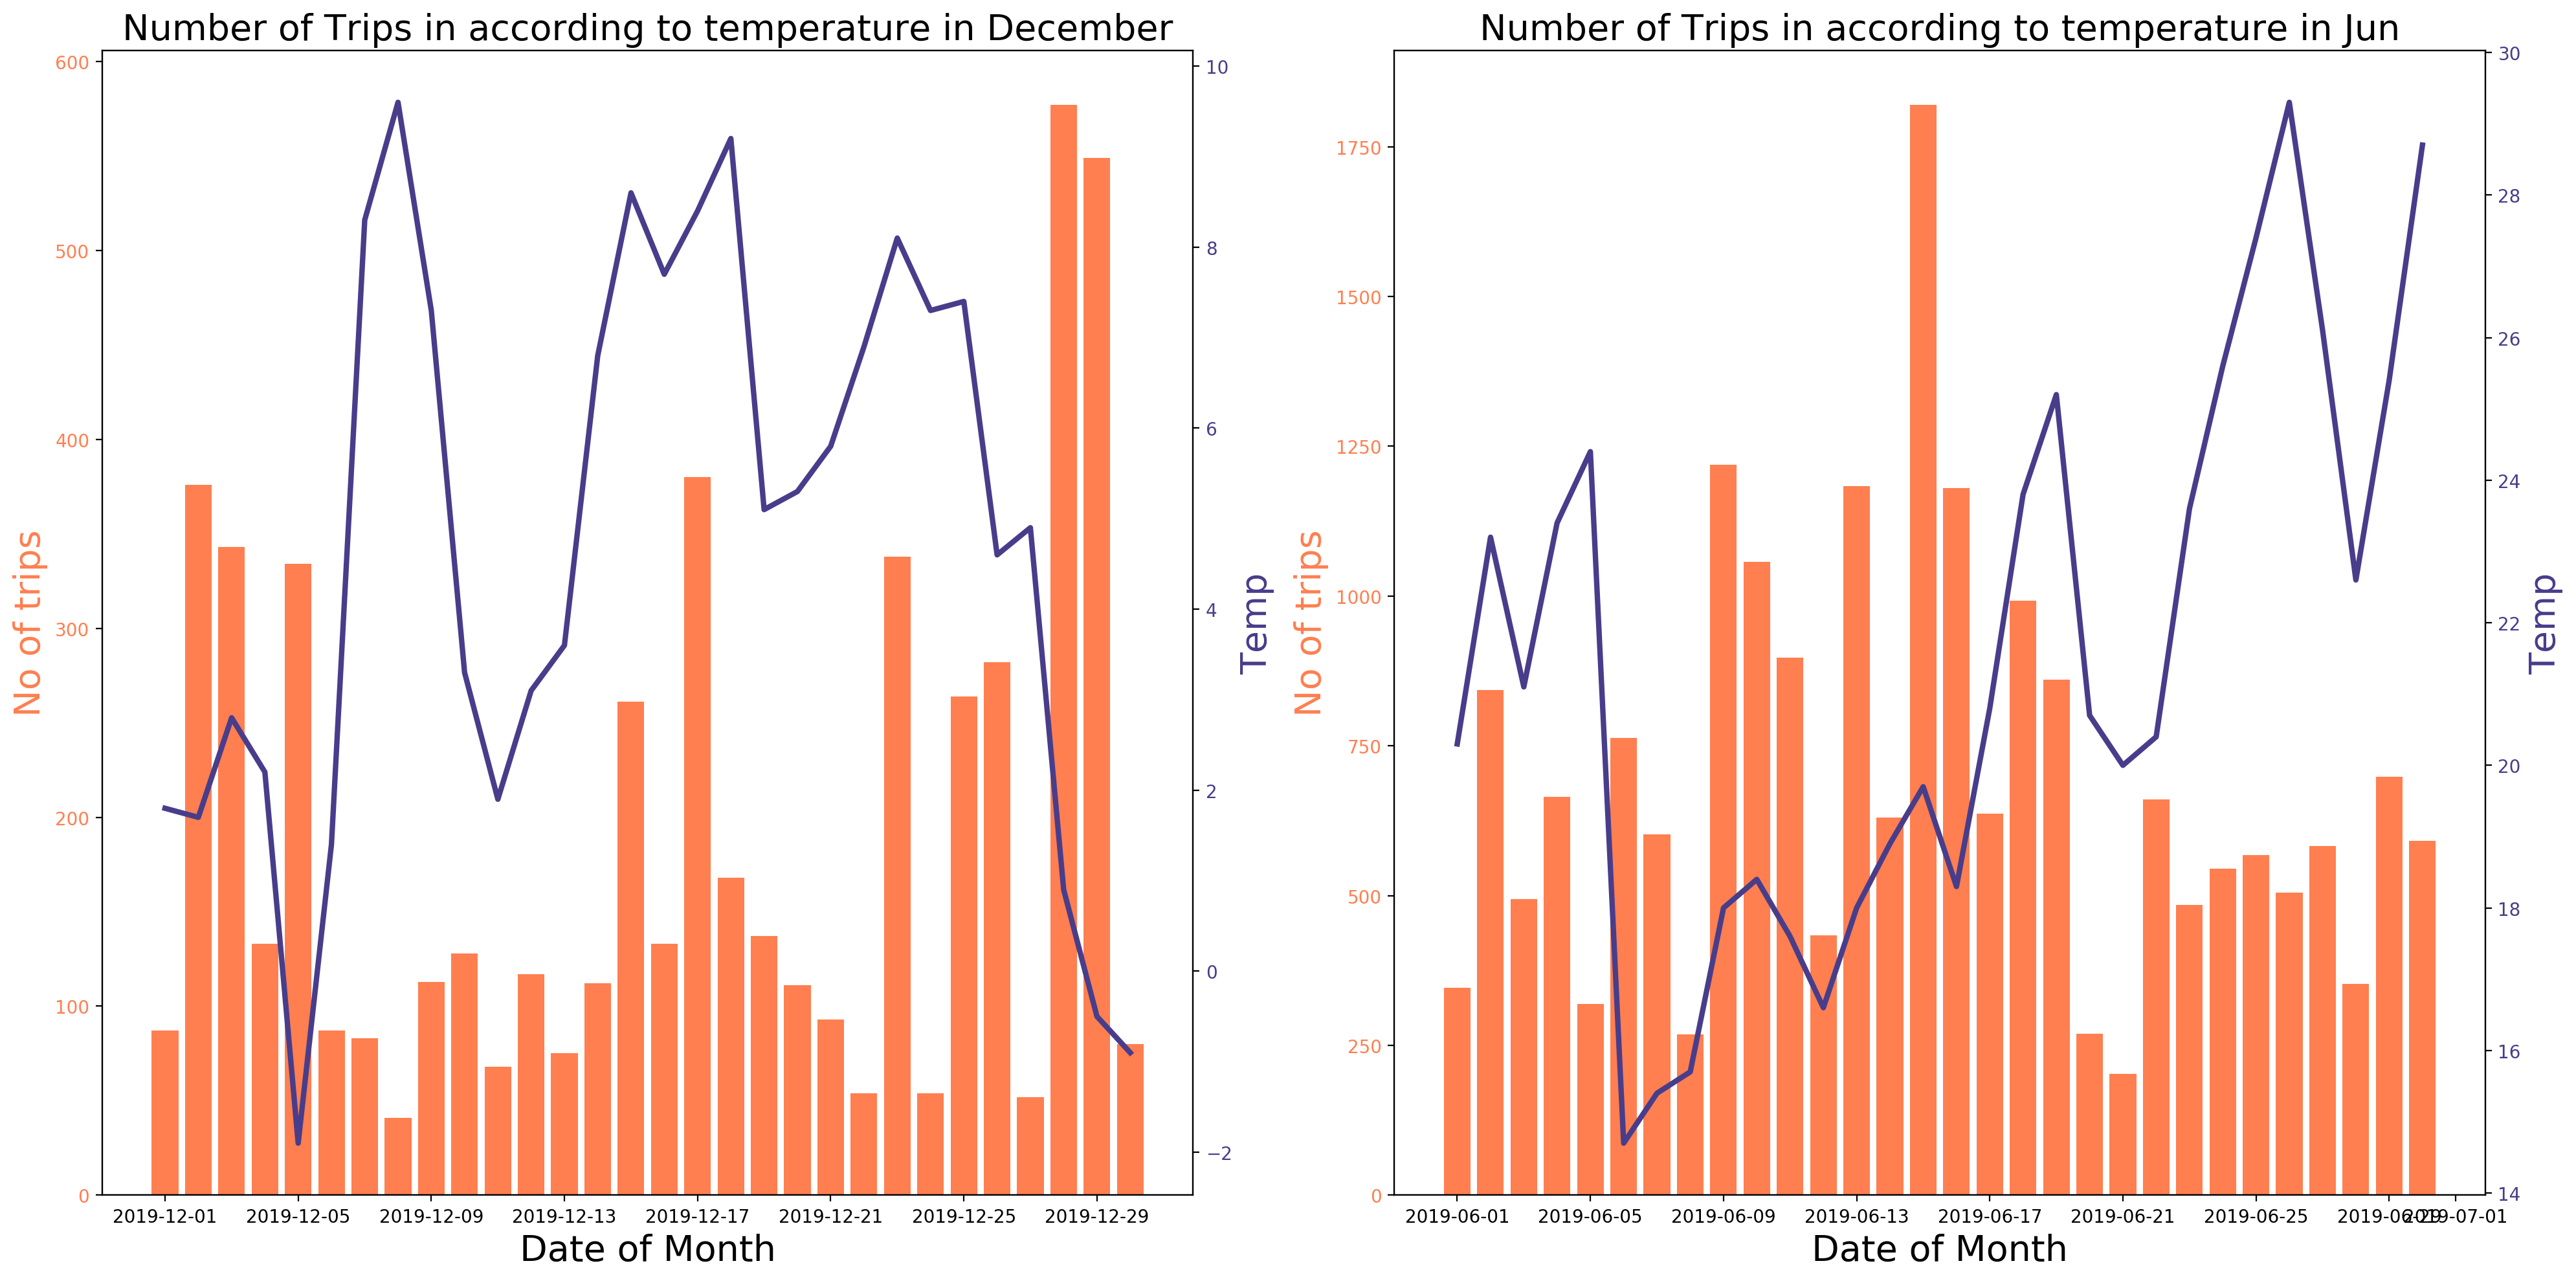

In [58]:
#Create a figure canvas with 2 axes
fig1 = plt.figure(figsize = (20,10), dpi = 200)

ax1 = fig1.add_subplot(1, 2, 1) #This will be used for December
ax3 = fig1.add_subplot(1, 2, 2) #This will be used for Jun

#Start with December
ax1.set_xlabel('Date of Month', fontsize = 20)
ax1.set_ylabel('No of trips', color='coral', fontsize = 20)
ax1.bar(df_dec['date'], df_dec['no_of_trips'], color='coral', align='center')
ax1.set_title('Number of Trips in according to temperature in December', fontsize = 20)
ax1.tick_params(axis='y', labelcolor='coral')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Temp', color='darkslateblue', fontsize = 20)  # we already handled the x-label with ax1
ax2.plot(df_dec['date'], df_dec['temp'], color='darkslateblue', linewidth=3)
ax2.tick_params(axis='y', labelcolor='darkslateblue')

#now plot the Jun data
ax3.set_xlabel('Date of Month', fontsize = 20)
ax3.set_ylabel('No of trips', color='coral', fontsize = 20)
ax3.bar(df_jun['date'], df_jun['no_of_trips'], color='coral', align='center')
ax3.tick_params(axis='y', labelcolor='coral')
ax3.set_title('Number of Trips in according to temperature in Jun', fontsize = 20)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

ax4.set_ylabel('Temp', color='darkslateblue', fontsize = 20)  # we already handled the x-label with ax1
ax4.plot(df_jun['date'], df_jun['temp'], color='darkslateblue', linewidth=3)
ax4.tick_params(axis='y', labelcolor='darkslateblue')

fig1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

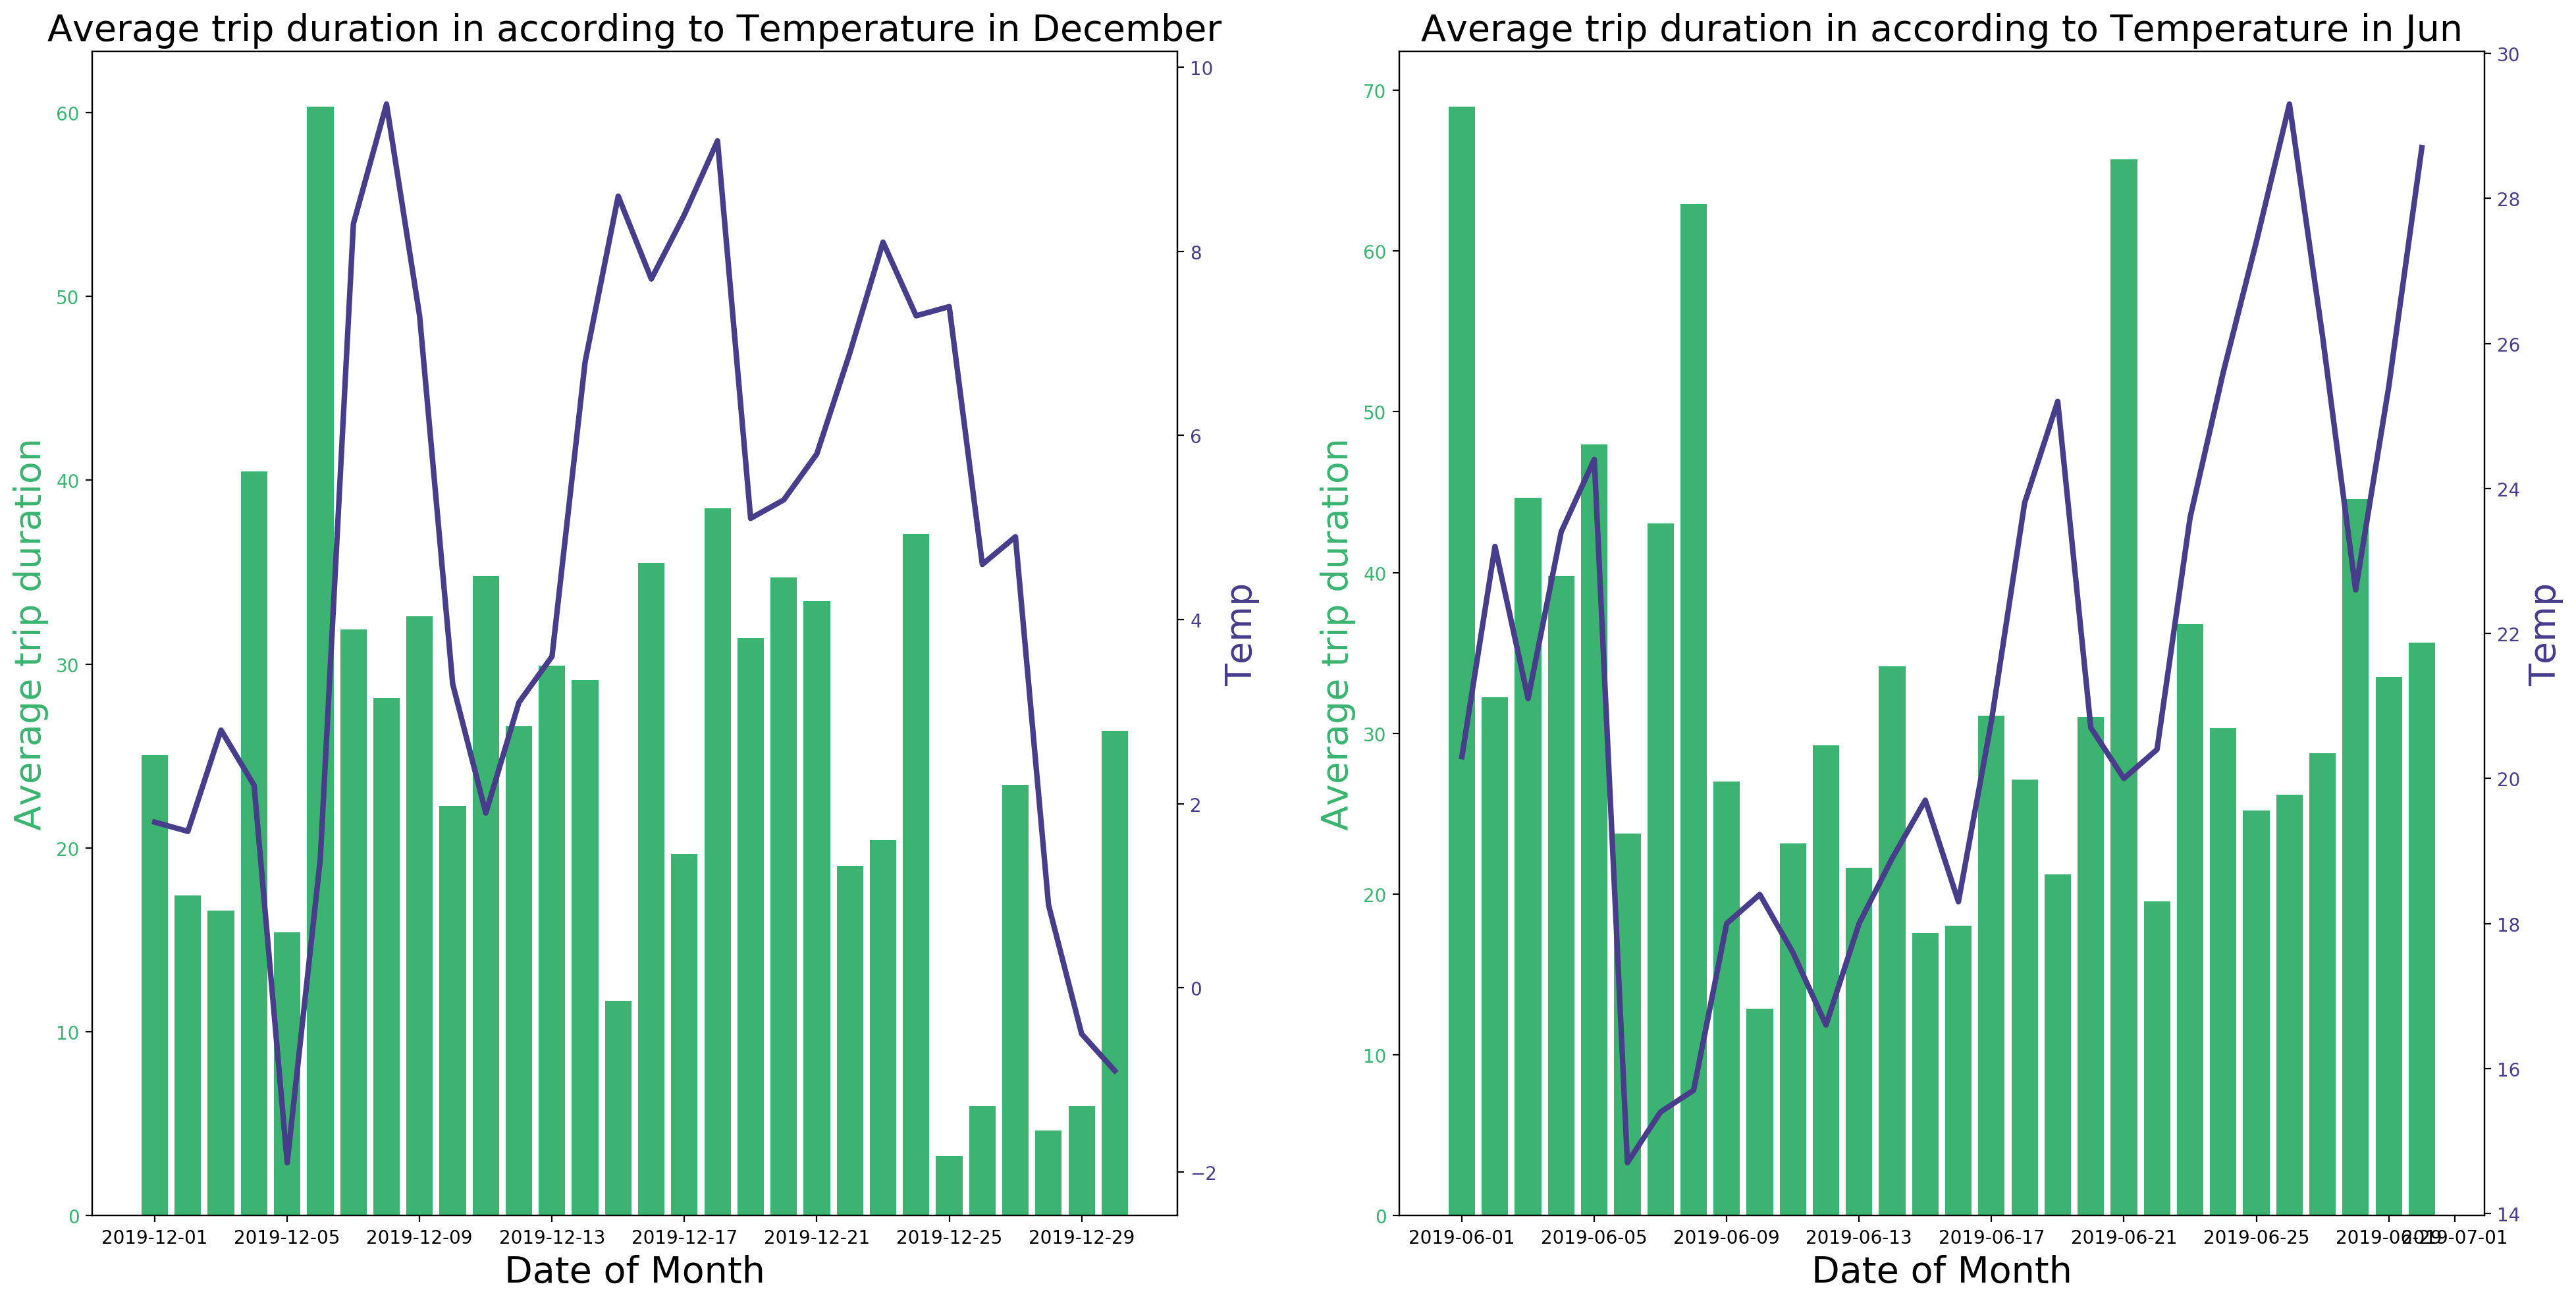

In [65]:
#Create a figure canvas with 2 axes
fig2 = plt.figure(figsize = (20,10), dpi = 200)

ax1 = fig2.add_subplot(1, 2, 1) #This will be used for December
ax3 = fig2.add_subplot(1, 2, 2) #This will be used for Jun

#Start with December
ax1.set_xlabel('Date of Month', fontsize = 20)
ax1.set_ylabel('Average trip duration', color='mediumseagreen', fontsize = 20)
ax1.bar(df_dec['date'], df_dec['avg_duration'], color='mediumseagreen', align='center')
ax1.set_title('Average trip duration in according to Temperature in December', fontsize = 20)
ax1.tick_params(axis='y', labelcolor='mediumseagreen')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Temp', color='darkslateblue', fontsize = 20)  # we already handled the x-label with ax1
ax2.plot(df_dec['date'], df_dec['temp'], color='darkslateblue', linewidth=3)
ax2.tick_params(axis='y', labelcolor='darkslateblue')

#now plot the Jun data
ax3.set_xlabel('Date of Month', fontsize = 20)
ax3.set_ylabel('Average trip duration', color='mediumseagreen', fontsize = 20)
ax3.bar(df_jun['date'], df_jun['avg_duration'], color='mediumseagreen', align='center')
ax3.tick_params(axis='y', labelcolor='mediumseagreen')
ax3.set_title('Average trip duration in according to Temperature in Jun', fontsize = 20)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

ax4.set_ylabel('Temp', color='darkslateblue', fontsize = 20)  # we already handled the x-label with ax1
ax4.plot(df_jun['date'], df_jun['temp'], color='darkslateblue', linewidth=3)
ax4.tick_params(axis='y', labelcolor='darkslateblue')

fig2.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

### Analysis 
From the charts in the first canvas, we can see that there is a negative relationship between number of trips made and temperature. So, the higher the temperature, the more trips made.

However, charts in second canvas show a positive relationship between temperature and the avg duration of each trip. As temperature increases, the longer trips are.

Although the temperature during winter is lower than that in Jun, but the trend holds true for both month.

Another important factor of weather condition is humidity. So I use the same method to see the relationship between humidity and the number of trips made, also with the avg trip duration

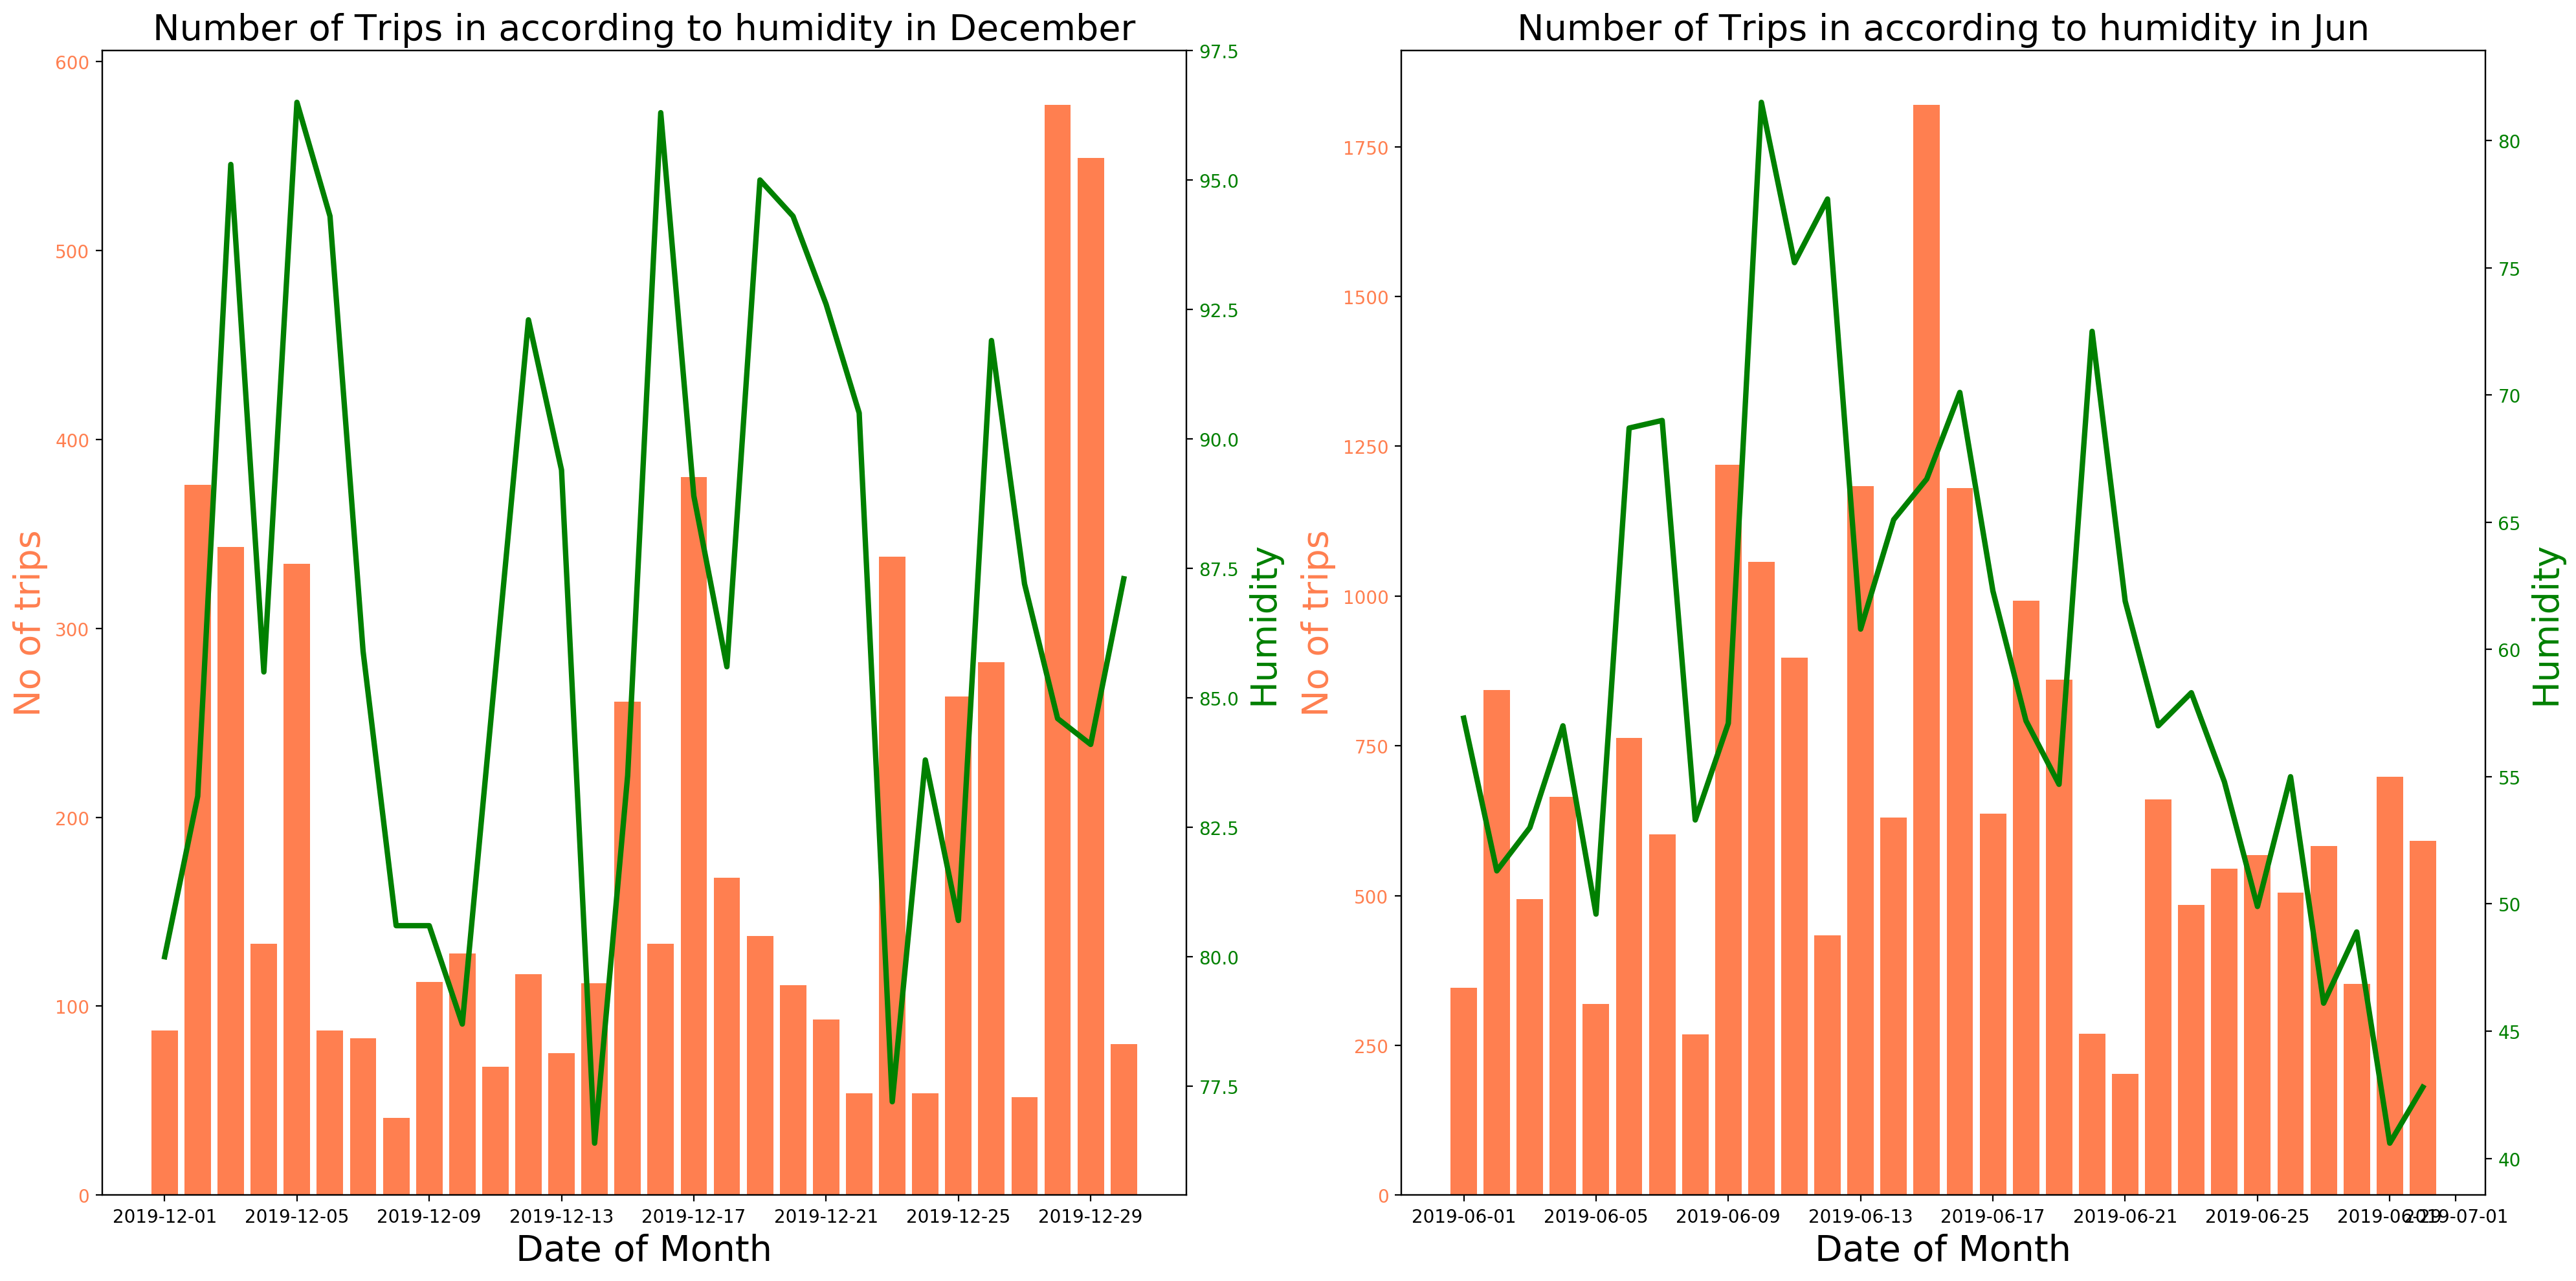

In [69]:
#Create a figure canvas with 2 axes
fig3 = plt.figure(figsize = (20,10), dpi = 200)

ax1 = fig3.add_subplot(1, 2, 1) #This will be used for December
ax3 = fig3.add_subplot(1, 2, 2) #This will be used for Jun

#Start with December
ax1.set_xlabel('Date of Month', fontsize = 20)
ax1.set_ylabel('No of trips', color='coral', fontsize = 20)
ax1.bar(df_dec['date'], df_dec['no_of_trips'], color='coral', align='center')
ax1.set_title('Number of Trips in according to humidity in December', fontsize = 20)
ax1.tick_params(axis='y', labelcolor='coral')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Humidity', color='green', fontsize = 20)  # we already handled the x-label with ax1
ax2.plot(df_dec['date'], df_dec['rh'], color='green', linewidth=3)
ax2.tick_params(axis='y', labelcolor='green')

#now plot the Jun data
ax3.set_xlabel('Date of Month', fontsize = 20)
ax3.set_ylabel('No of trips', color='coral', fontsize = 20)
ax3.bar(df_jun['date'], df_jun['no_of_trips'], color='coral', align='center')
ax3.tick_params(axis='y', labelcolor='coral')
ax3.set_title('Number of Trips in according to humidity in Jun', fontsize = 20)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

ax4.set_ylabel('Humidity', color='green', fontsize = 20)  # we already handled the x-label with ax1
ax4.plot(df_jun['date'], df_jun['rh'], color='green', linewidth=3)
ax4.tick_params(axis='y', labelcolor='green')

fig3.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

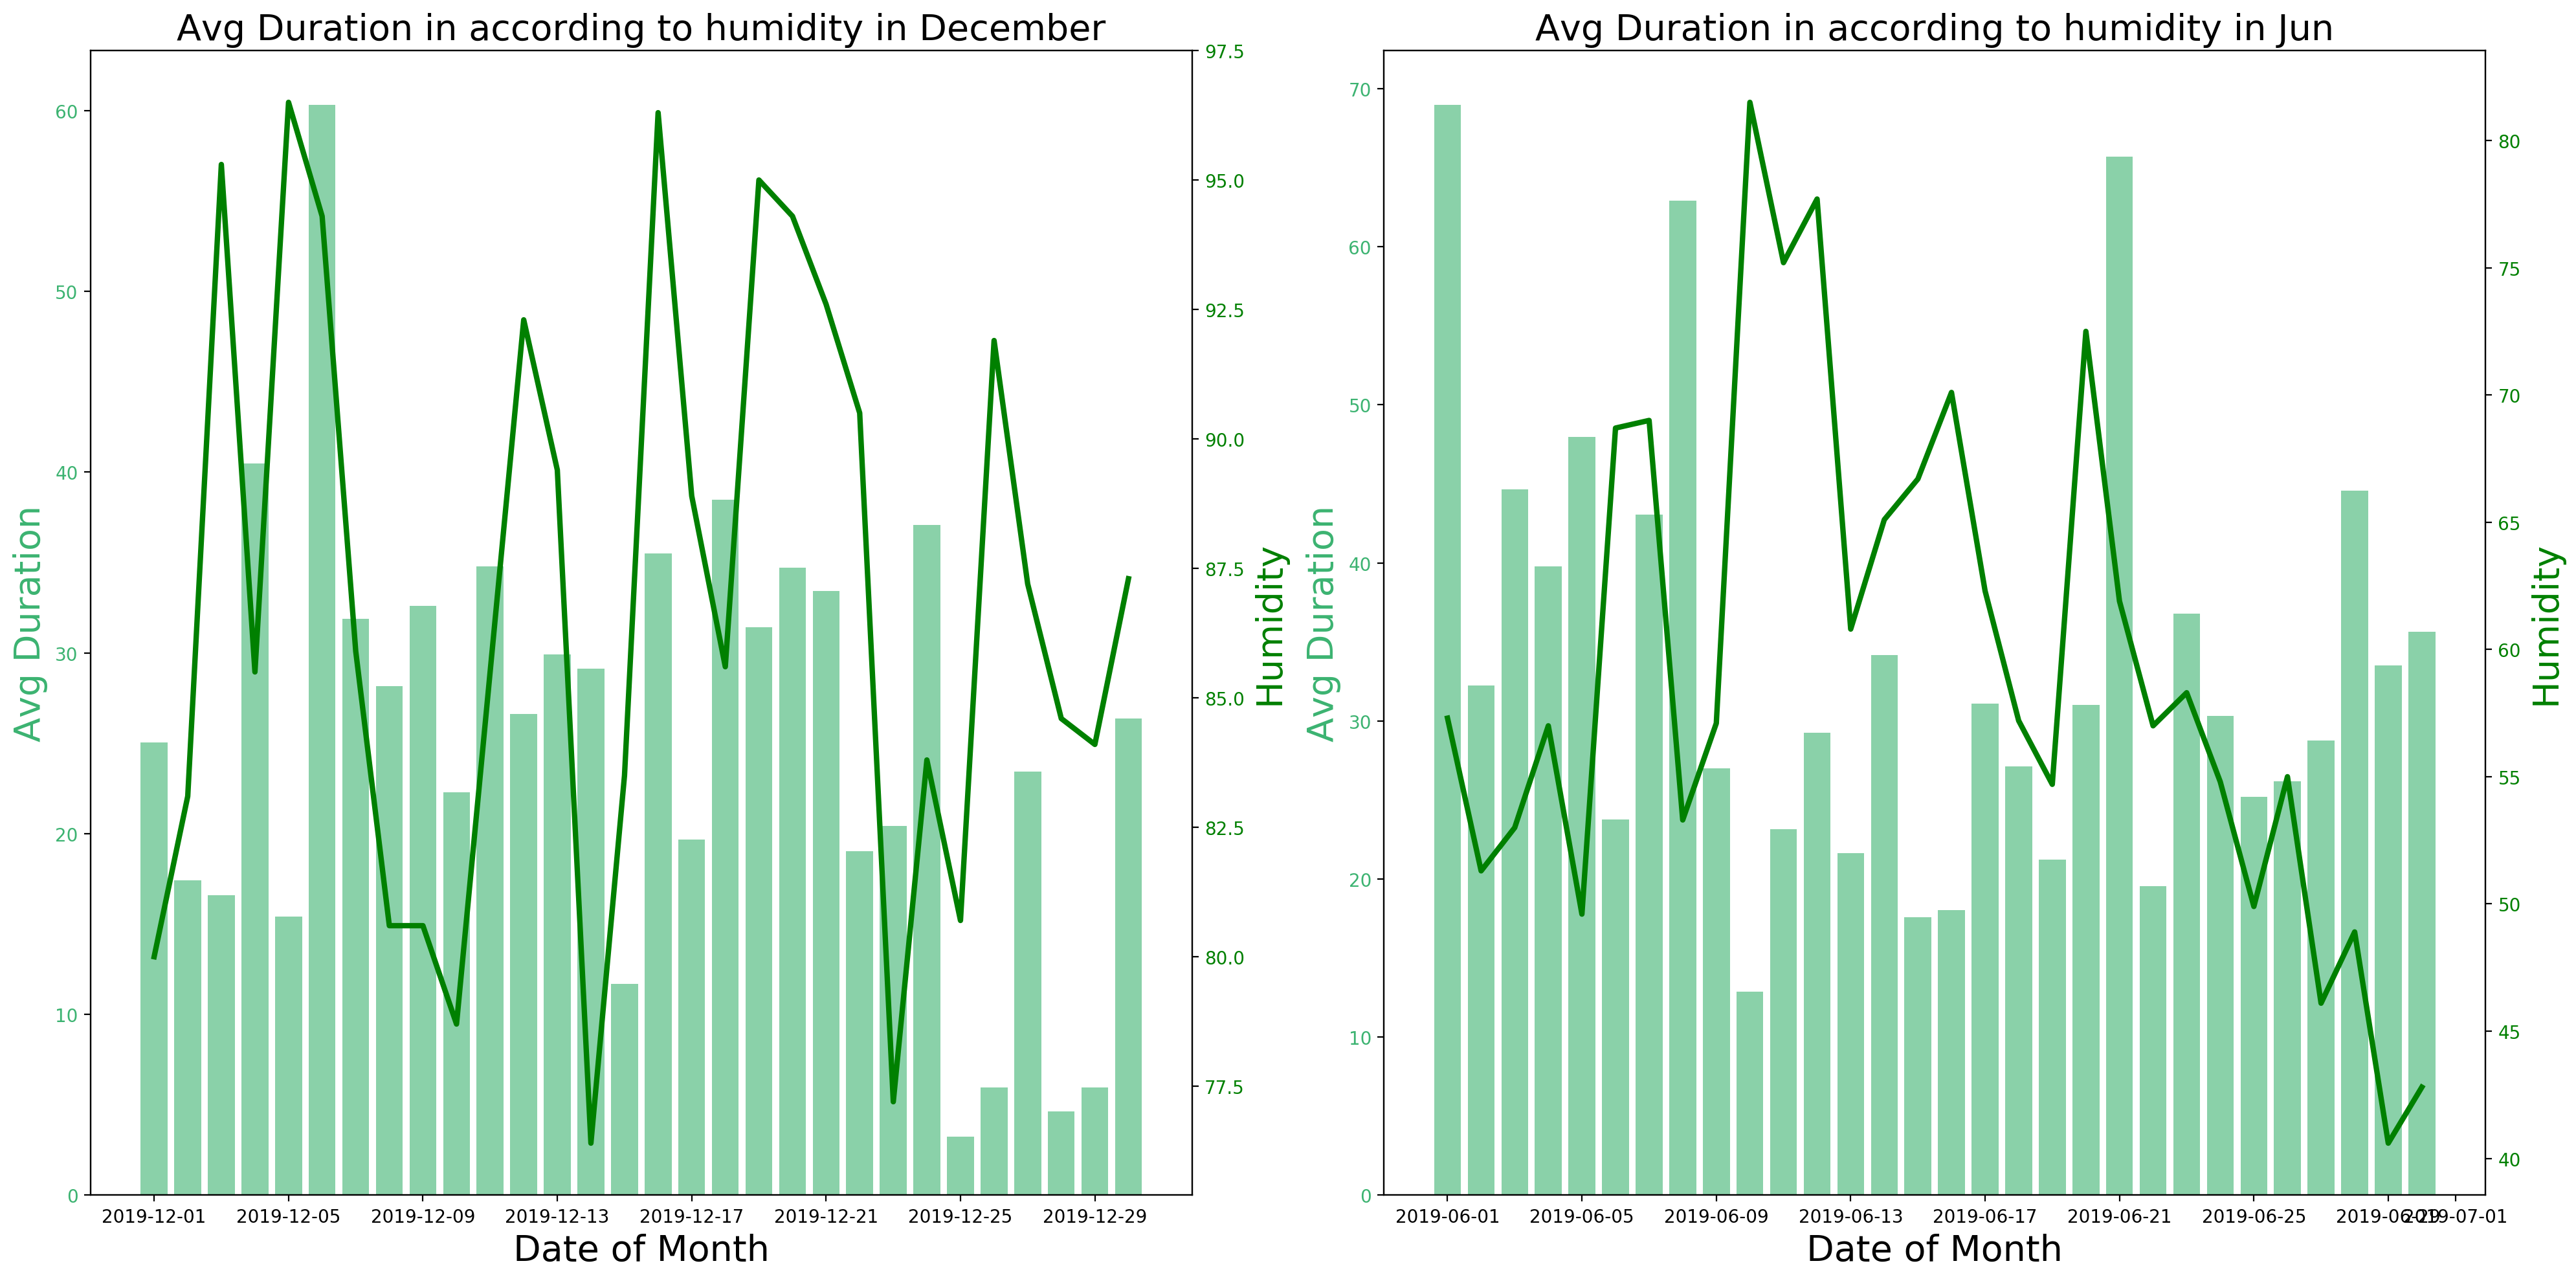

In [70]:
#Create a figure canvas with 2 axes
fig4 = plt.figure(figsize = (20,10), dpi = 200)

ax1 = fig4.add_subplot(1, 2, 1) #This will be used for December
ax3 = fig4.add_subplot(1, 2, 2) #This will be used for Jun

#Start with December
ax1.set_xlabel('Date of Month', fontsize = 20)
ax1.set_ylabel('Avg Duration', color='mediumseagreen', fontsize = 20)
ax1.bar(df_dec['date'], df_dec['avg_duration'], color='mediumseagreen', alpha = 0.6, align='center')
ax1.set_title('Avg Duration in according to humidity in December', fontsize = 20)
ax1.tick_params(axis='y', labelcolor='mediumseagreen')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Humidity', color='green', fontsize = 20)  # we already handled the x-label with ax1
ax2.plot(df_dec['date'], df_dec['rh'], color='green', linewidth=3)
ax2.tick_params(axis='y', labelcolor='green')

#now plot the Jun data
ax3.set_xlabel('Date of Month', fontsize = 20)
ax3.set_ylabel('Avg Duration', color='mediumseagreen', fontsize = 20)
ax3.bar(df_jun['date'], df_jun['avg_duration'], color='mediumseagreen', alpha = 0.6, align='center')
ax3.tick_params(axis='y', labelcolor='mediumseagreen')
ax3.set_title('Avg Duration in according to humidity in Jun', fontsize = 20)

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis

ax4.set_ylabel('Humidity', color='green', fontsize = 20)  # we already handled the x-label with ax1
ax4.plot(df_jun['date'], df_jun['rh'], color='green', linewidth=3)
ax4.tick_params(axis='y', labelcolor='green')

fig4.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

### Analysis 

As humidity fluctuates quite heavily in December, the trend is hard to capture. However, the charts in both canvas show a negative relationship between humidity level of the weather with both number of trips made and the average duration of each trip.

To futher explore these relationship, I employ regression to see if the the relationship holds true for the whole year

In [71]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [72]:
%%capture
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

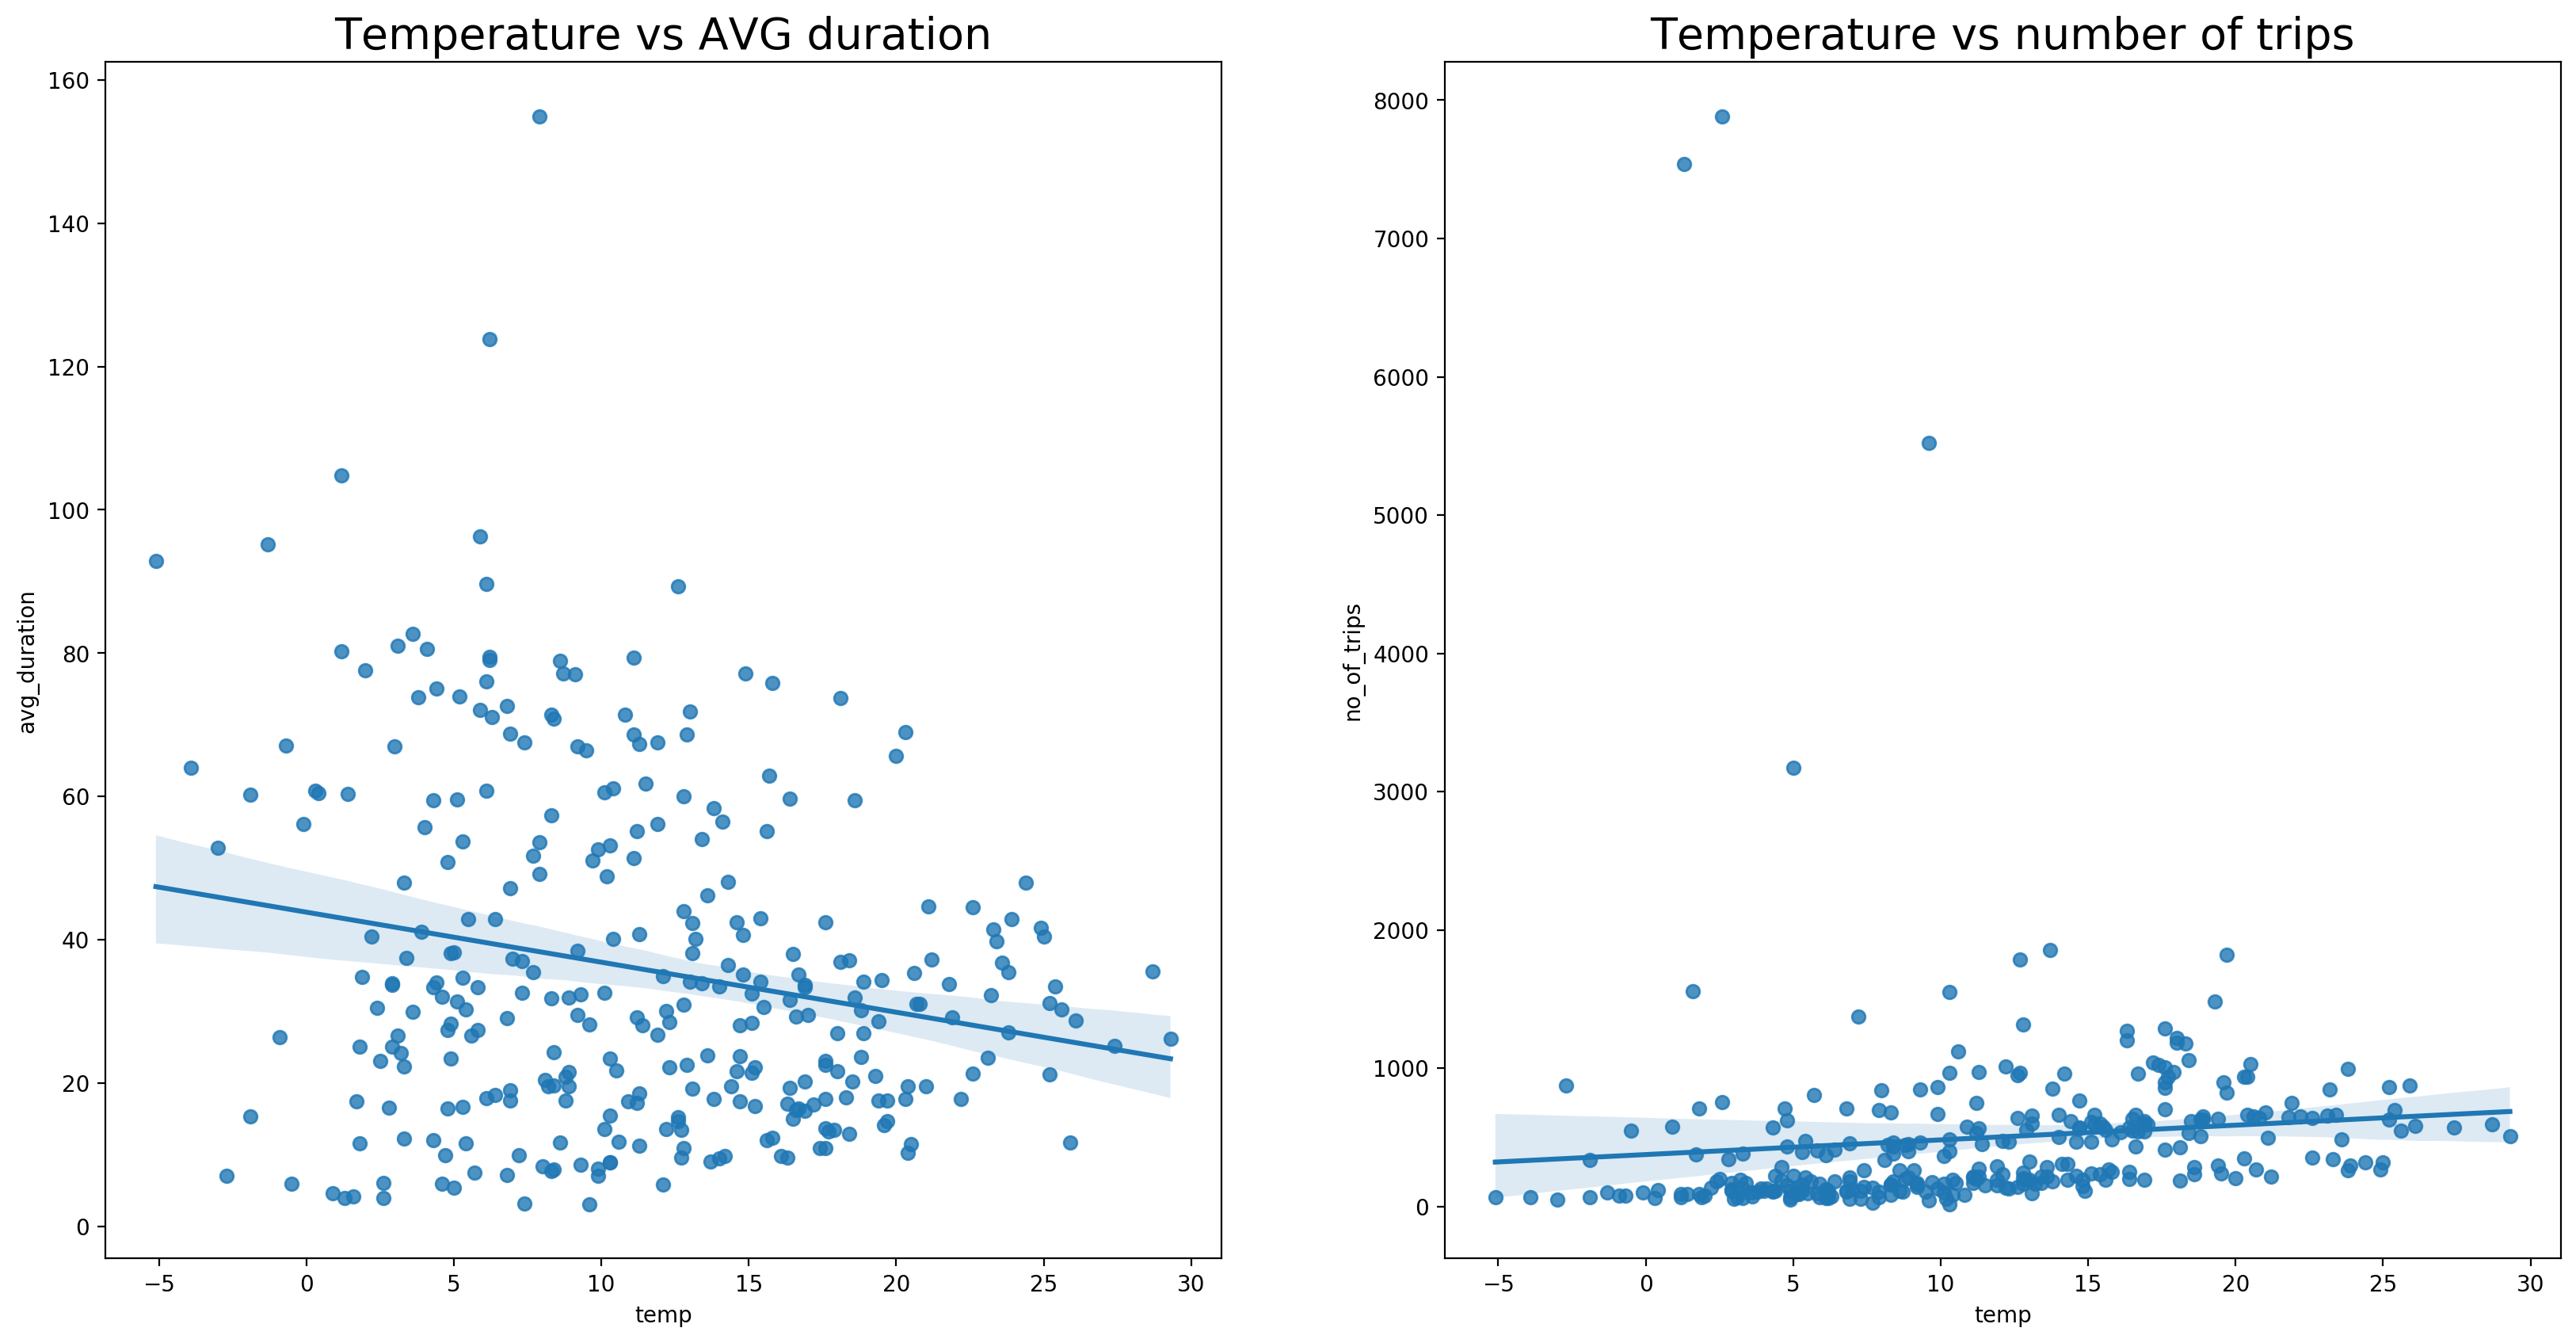

In [74]:
#Create a figure canvas with 2 axes
fig5 = plt.figure(figsize = (20,10), dpi = 200)

ax1 = fig5.add_subplot(1, 2, 1)
ax2 = fig5.add_subplot(1, 2, 2)

sns.regplot(x=df[['temp']], y=df["avg_duration"], data=df, ax=ax1)
ax1.set_title('Temperature vs AVG duration', fontsize = 20)
sns.regplot(x=df[['temp']], y=df["no_of_trips"], data=df, ax=ax2)
ax2.set_title('Temperature vs number of trips', fontsize = 20)
plt.show()

In the plot chart, I see there are outliners in both chart, since there are not so many outliners, they could be removed to explore the relationship better

In [75]:
df_new = df.drop(df[df['no_of_trips'] >2000].index)
df_new.tail()

,avg_duration,weekday,no_of_trips,month,temp,rh
date,,,,,,
2019-12-26,5.964539,1.0,282,12.0,4.6,91.9
2019-12-27,23.442308,1.0,52,12.0,4.9,87.2
2019-12-28,4.642981,0.0,577,12.0,0.9,84.6
2019-12-29,5.961749,0.0,549,12.0,-0.5,84.1
2019-12-30,26.375000,1.0,80,12.0,-0.9,87.3


In [76]:
df_new = df_new.drop(df_new[df_new['avg_duration'] >120].index)
df_new.tail()

,avg_duration,weekday,no_of_trips,month,temp,rh
date,,,,,,
2019-12-26,5.964539,1.0,282,12.0,4.6,91.9
2019-12-27,23.442308,1.0,52,12.0,4.9,87.2
2019-12-28,4.642981,0.0,577,12.0,0.9,84.6
2019-12-29,5.961749,0.0,549,12.0,-0.5,84.1
2019-12-30,26.375000,1.0,80,12.0,-0.9,87.3


Now run the regression again

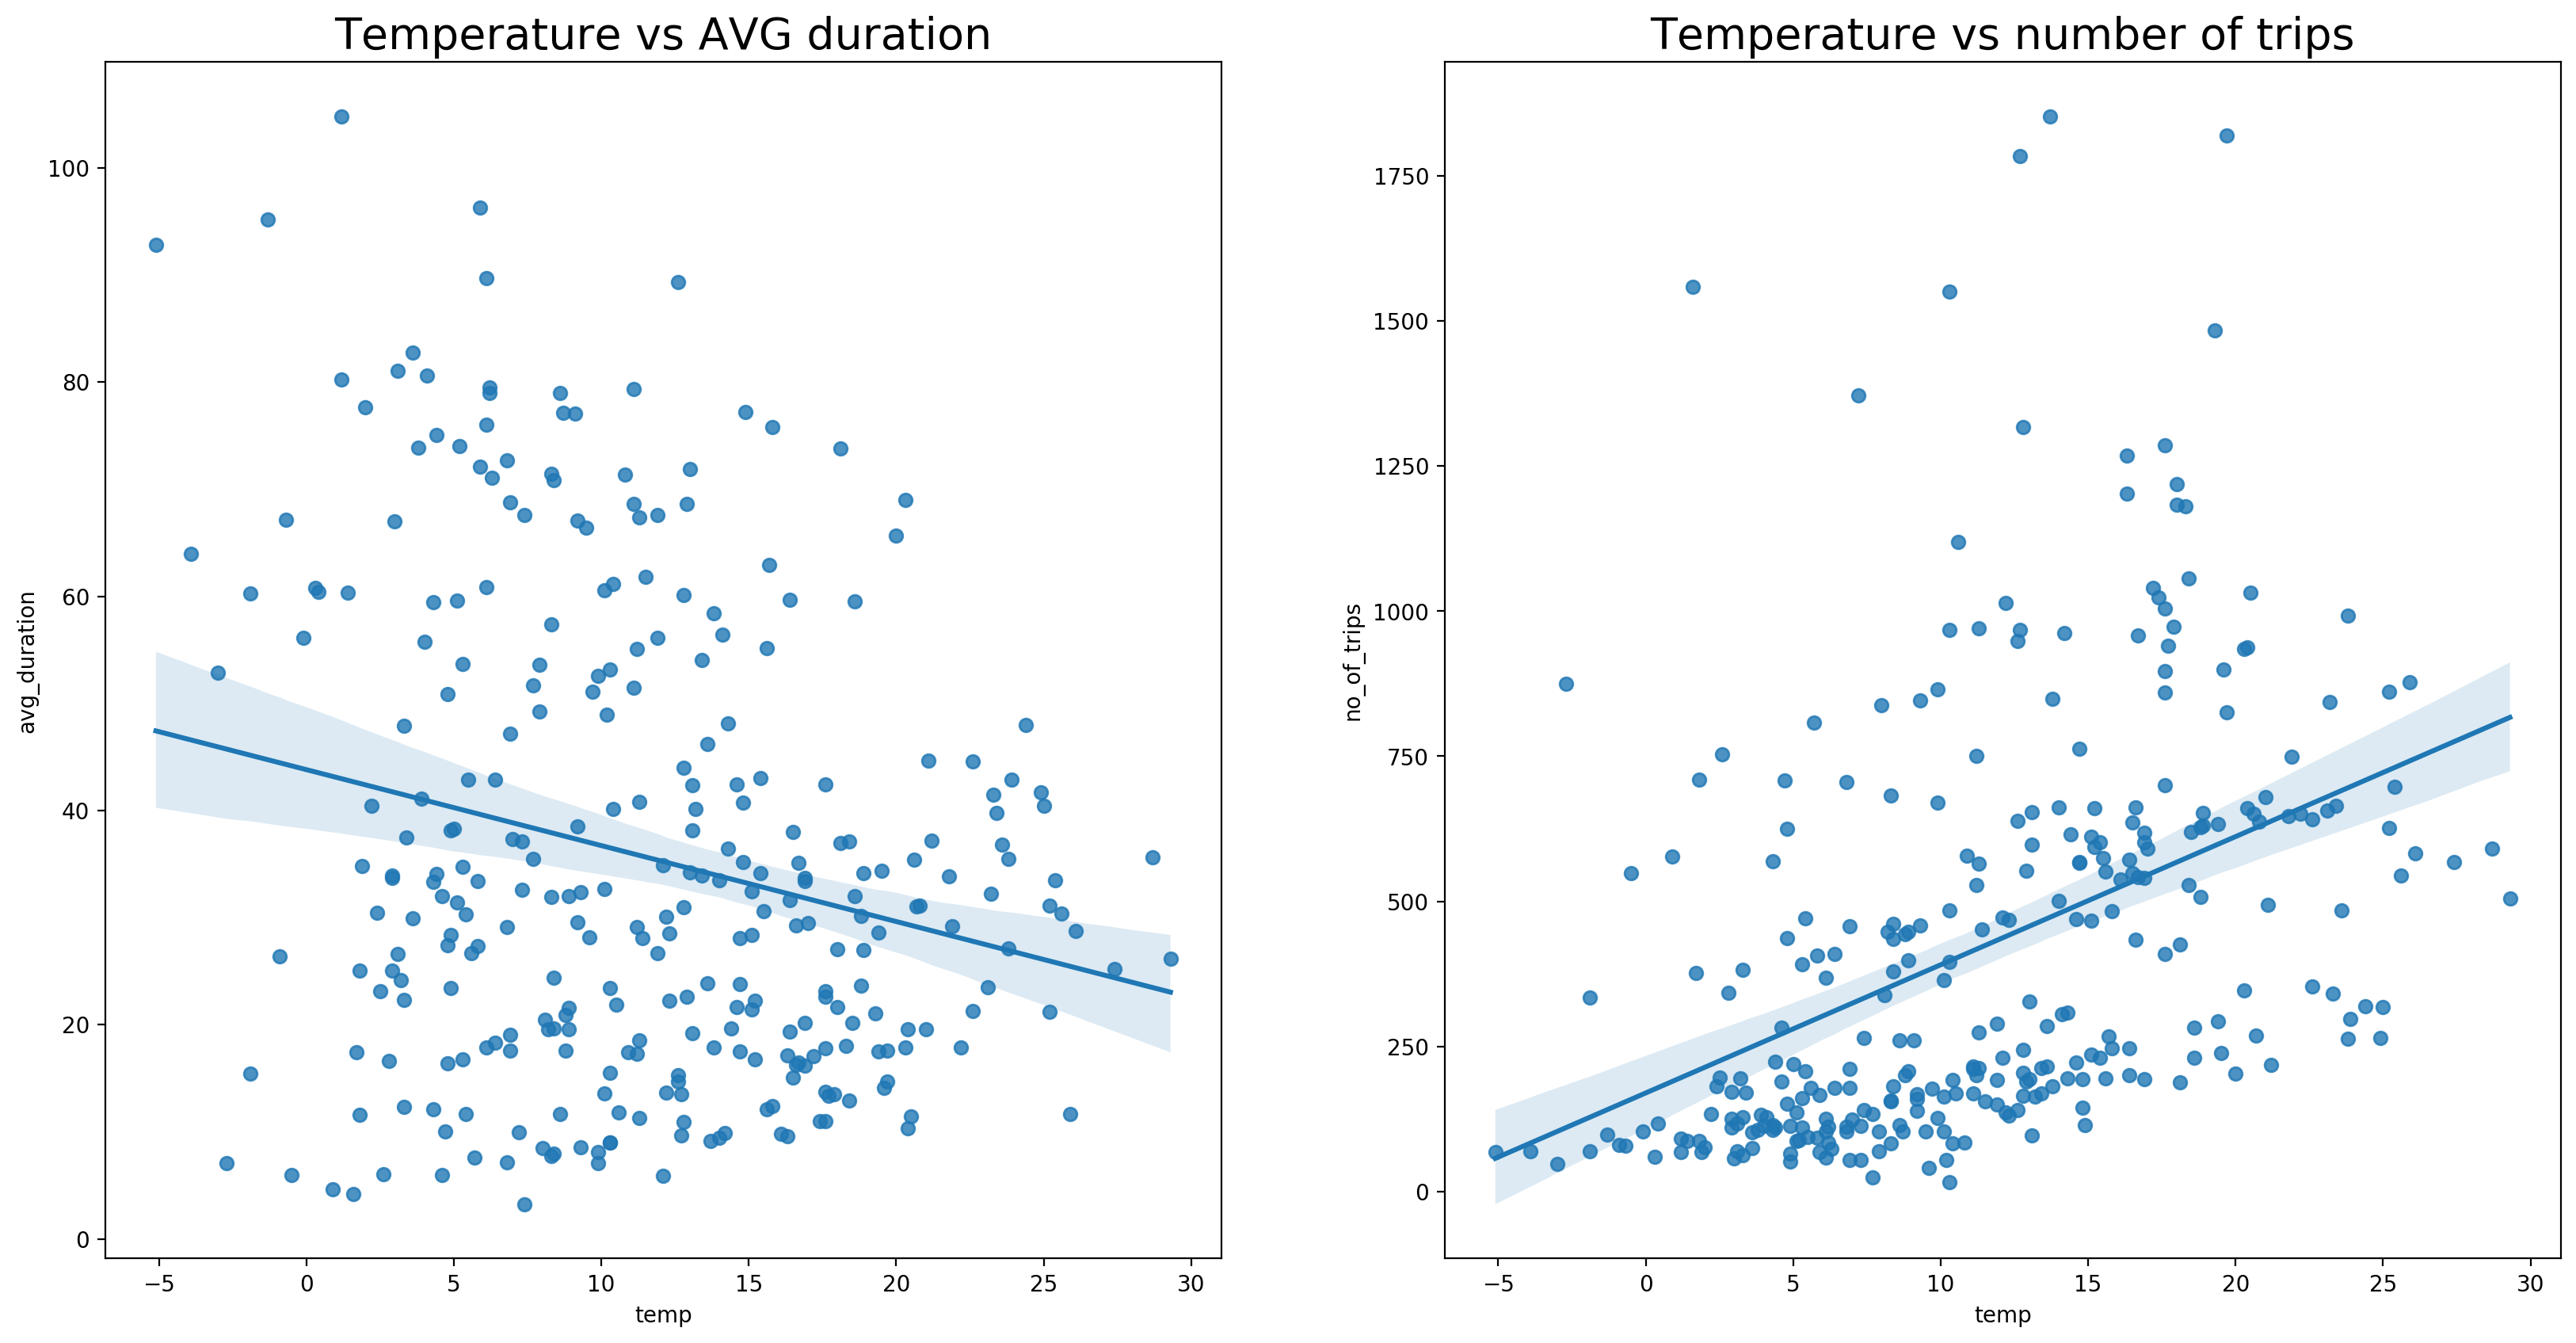

In [79]:
fig6 = plt.figure(figsize = (20,10), dpi = 200)

ax1 = fig6.add_subplot(1, 2, 1)
ax2 = fig6.add_subplot(1, 2, 2)

sns.regplot(x=df_new[['temp']], y=df_new["avg_duration"], data=df_new, ax=ax1)
ax1.set_title('Temperature vs AVG duration', fontsize = 20)
sns.regplot(x=df_new[['temp']], y=df_new["no_of_trips"], data=df_new, ax=ax2)
ax2.set_title('Temperature vs number of trips', fontsize = 20)
plt.show()

In [81]:
X =df_new[['temp']]
Y =df_new["avg_duration"]
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print('Regression results for Temp vs Avg Duration')
print(est2.summary())

Regression results for Temp vs Avg Duration
                            OLS Regression Results                            
Dep. Variable:           avg_duration   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     16.00
Date:                Wed, 13 May 2020   Prob (F-statistic):           7.96e-05
Time:                        12:37:19   Log-Likelihood:                -1365.5
No. Observations:                 305   AIC:                             2735.
Df Residuals:                     303   BIC:                             2742.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

In [82]:
X =df_new[['temp']]
Y =df_new["no_of_trips"]
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print('Regression results for Temp vs Number of trips')
print(est2.summary())

Regression results for Temp vs Number of trips
                            OLS Regression Results                            
Dep. Variable:            no_of_trips   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     68.63
Date:                Wed, 13 May 2020   Prob (F-statistic):           3.88e-15
Time:                        12:37:50   Log-Likelihood:                -2192.1
No. Observations:                 305   AIC:                             4388.
Df Residuals:                     303   BIC:                             4396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

### Analysis
Both the regression plot and regression results show:
 - There is negative relationship between temperature and the average trip duration. The P value is significant with the coefficient is -0.7092. As the temperature increases, the average trip duration decreases. 
 - On the other hand, there is posititve relationship between temperature and the number of trips made. With significant P value and coefficent 22.08, this relationship is strong. As temperature increases, more trips are made.
 
This results confirms one of the study goals to explore the relationship between weather conditions and trips made.

### The scope of activities

In order to see which area people use the bikes, the next part of the study will explore activity are on the map

In [83]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          63 KB

The following packages will be UPDATED:

  geopy                                         1.21.0-py_0 --> 1.22.0-pyh9f0ad1d_0




geopy-1.22.0         | 63 KB     |            |   0% 
geopy-1.22.0         | 63 KB     | ##5        |  26% 
geopy-1.22.0         | 63 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Solving environment: ...working... done

# All requested packages already install

In [84]:
# define the world map centered around city in study
ffmap = folium.Map(location=[50.107254, 8.685223], zoom_start=10)

# display the map
ffmap

In [85]:
from folium.plugins import HeatMap
trip_wduration['count'] = 1
HeatMap(data=trip_wduration[['End_Latitude', 'End_Longitude', 'count']].groupby(['End_Latitude', 'End_Longitude']).sum().reset_index().values.tolist(),
        radius=8, 
        max_zoom=13).add_to(ffmap)

In [86]:
ffmap

### Analysis
From the map, we can see that the city center is main area which people use the bike. This is not a surprise since the intention of the bike system is for urban mobility. 

Because the number of trips in the whole year is quite many, it would be useful to look at the data for month with less trip to explore where people go. In this study, I take December as the target to study

In [88]:
df_for_map = trip_wduration.set_index('date_of_month')
df_for_map.tail()

,Station_position,Type_of_Place,Starttime,Bike_number,Start_position_UID,Bikes_on_position,Start_Latitude,Bikes_type,Station_number,Start_Longitude,...,duration,weekday,Endtime,End_position_UID,End_Latitude,End_Longitude,month,duration_in_s,duration_in_m,count
date_of_month,,,,,,,,,,,,,,,,,,,,,
2019-05-07,False,12,2019-05-07 09:36:00,91229,15425765,1,50.585947,71,0.0,8.683895,...,02:12:00,True,2019-05-07 11:48:00,15435639,50.583418,8.673678,5,7920.0,132.0,1
2019-05-07,False,12,2019-05-07 12:00:00,91229,15435639,1,50.583418,71,0.0,8.673678,...,00:11:00,True,2019-05-07 12:11:00,15441152,50.573378,8.700063,5,660.0,11.0,1
2019-05-07,False,12,2019-05-07 14:04:00,91229,15441152,1,50.572982,71,0.0,8.700078,...,00:16:00,True,2019-05-07 14:20:00,15446868,50.580484,8.664531,5,960.0,16.0,1
2019-05-07,False,12,2019-05-07 19:54:00,91229,15446868,1,50.580916,71,0.0,8.664705,...,00:10:00,True,2019-05-07 20:04:00,15462432,50.582658,8.680114,5,600.0,10.0,1
2019-05-08,False,12,2019-05-08 04:17:00,91229,15469138,1,50.583764,71,0.0,8.680127,...,00:08:00,True,2019-05-08 04:25:00,15470590,50.575929,8.693904,5,480.0,8.0,1


In [93]:
df_for_map.reset_index(inplace=True)

In [97]:
#create a new dataframe for December trips
df_dec_map = df_for_map[df_for_map['month']==12] 
df_dec_map

,date_of_month,Station_position,Type_of_Place,Starttime,Bike_number,Start_position_UID,Bikes_on_position,Start_Latitude,Bikes_type,Station_number,...,duration,weekday,Endtime,End_position_UID,End_Latitude,End_Longitude,month,duration_in_s,duration_in_m,count
42,2019-12-02,False,12,2019-12-02 09:17:00,12023,25398217,1,50.133477,15,0.0,...,00:02:00,True,2019-12-02 09:19:00,25398217,50.133477,8.930268,12,120.0,2.0,1
43,2019-12-03,False,12,2019-12-03 11:45:00,12023,25398217,1,50.133477,15,0.0,...,00:16:00,True,2019-12-03 12:01:00,25398217,50.133477,8.930268,12,960.0,16.0,1
44,2019-12-05,False,12,2019-12-05 11:06:00,12023,25398217,1,50.133477,15,0.0,...,00:03:00,True,2019-12-05 11:09:00,25398217,50.133477,8.930268,12,180.0,3.0,1
432,2019-12-01,True,0,2019-12-01 12:26:00,38001,4919975,3,50.123591,15,4254.0,...,00:28:00,False,2019-12-01 12:54:00,25516003,50.101770,8.676453,12,1680.0,28.0,1
433,2019-12-01,False,12,2019-12-01 13:02:00,38001,25516003,1,50.101770,15,0.0,...,00:03:00,False,2019-12-01 13:05:00,25516294,50.101770,8.676453,12,180.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154289,2019-12-28,True,0,2019-12-28 14:47:00,38999,14997159,3,50.115556,15,42006.0,...,00:02:00,False,2019-12-28 14:49:00,14997159,50.115556,8.682500,12,120.0,2.0,1
154290,2019-12-28,True,0,2019-12-28 16:37:00,38999,14997159,3,50.115556,15,42006.0,...,00:16:00,False,2019-12-28 16:53:00,121963,50.128915,8.692439,12,960.0,16.0,1
154291,2019-12-28,True,0,2019-12-28 22:58:00,38999,121963,1,50.128915,15,4252.0,...,00:02:00,False,2019-12-28 23:00:00,121963,50.128915,8.692439,12,120.0,2.0,1
154292,2019-12-29,True,0,2019-12-29 02:55:00,38999,121963,1,50.128915,15,4252.0,...,00:02:00,False,2019-12-29 02:57:00,121963,50.128915,8.692439,12,120.0,2.0,1


In [98]:
#create a new map for only December
ffmap2 = folium.Map(location=[50.107254, 8.685223], zoom_start=10)
from folium.plugins import HeatMap
df_dec_map['count'] = 1
HeatMap(data=df_dec_map[['End_Latitude', 'End_Longitude', 'count']].groupby(['End_Latitude', 'End_Longitude']).sum().reset_index().values.tolist(),
        radius=8, 
        max_zoom=13).add_to(ffmap2)
ffmap2

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The heat map also shows the same behavior that people use bikes in mainly in the city center. This is again the main purpose of urban bikes as they are designed for urban mobility. The next step is to see the most popular are where people go. To do that, I start with a hyporthesis:
 - In winter, as the temperature drops, people will more likely to go outdoor only if nescessary. Therefore, locations such as market, school and office would be the places to go. 
 
I use Foursquare to get the locations of the above-mentioned location and plot them on the map to see if they matches the heatmap

In [99]:
CLIENT_ID = 'Your ID' #  Foursquare ID
CLIENT_SECRET = 'Your secret' #  Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Foursquare information is ready')

Foursquare information is ready


In [101]:
# I use the Römer as the starting point for the search
# nominatim to get the location lat and long
address = 'Römer'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

50.1104684 8.6816587


In [102]:
#
search_query = 'market'
radius = 10000
print(search_query + ' .... OK!')

market .... OK!


In [103]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=JBNVGSZE4KVWPFE3KRWSERRKHPN1I4XDVSOPINMLTBUQW0VQ&client_secret=Z1L040VW0XAA3BE4XU5F33GMWRMT21T2BEWRUHOMFTNOKZYQ&ll=50.1104684,8.6816587&v=20180604&query=market&radius=10000&limit=30'

In [104]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ebb988b660a9f001fe0084b'},
 'response': {'venues': [{'id': '57a5f8fb498ee55eb8394f0d',
    'name': 'Street Food Market',
    'location': {'lat': 50.11126599727918,
     'lng': 8.681840951636858,
     'labeledLatLngs': [{'label': 'display',
       'lat': 50.11126599727918,
       'lng': 8.681840951636858}],
     'distance': 89,
     'cc': 'DE',
     'city': 'Frankfurt am Main',
     'state': 'Hessen',
     'country': 'Deutschland',
     'formattedAddress': ['Frankfurt am Main', 'Deutschland']},
    'categories': [{'id': '4bf58dd8d48988d1cb941735',
      'name': 'Food Truck',
      'pluralName': 'Food Trucks',
      'shortName': 'Food Truck',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1589352993',
    'hasPerk': False},
   {'id': '4de4edfd45dd180ae5805a0d',
    'name': 'Quotapoint Market Research',
    'location': {'address': 'Am Salzhaus 

In [105]:
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.postalCode,location.neighborhood,venuePage.id
0,57a5f8fb498ee55eb8394f0d,Street Food Market,"[{'id': '4bf58dd8d48988d1cb941735', 'name': 'F...",v-1589352993,False,50.111266,8.681841,"[{'label': 'display', 'lat': 50.11126599727918...",89,DE,Frankfurt am Main,Hessen,Deutschland,"[Frankfurt am Main, Deutschland]",NaN,NaN,NaN,NaN
1,4de4edfd45dd180ae5805a0d,Quotapoint Market Research,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1589352993,False,50.111633,8.677800,"[{'label': 'display', 'lat': 50.11163281668421...",304,DE,Frankfurt am Main,Hessen,Deutschland,"[Am Salzhaus 2, 60311 Frankfurt am Main, Deuts...",Am Salzhaus 2,60311,NaN,NaN
2,4cdbbf5439172d434a1483d8,MAS Market At Sight,"[{'id': '4bf58dd8d48988d11d951735', 'name': 'B...",v-1589352993,False,50.114607,8.682813,"[{'label': 'display', 'lat': 50.11460714658487...",468,DE,Frankfurt am Main,Hessen,Deutschland,"[Zeil 83, 60313 Frankfurt am Main, Deutschland]",Zeil 83,60313,NaN,NaN
3,59dcb5b448b04e6182dd549f,Institute For Market Research (IMR),"[{'id': '56aa371be4b08b9a8d573517', 'name': 'B...",v-1589352993,False,50.113948,8.679096,"[{'label': 'display', 'lat': 50.113948, 'lng':...",428,DE,Frankfurt am Main,Hessen,Deutschland,"[Frankfurt am Main, Deutschland]",NaN,NaN,NaN,NaN
4,4c8195fdd8086dcb2cb76e52,Rock Market,[],v-1589352993,False,50.116276,8.684595,"[{'label': 'display', 'lat': 50.11627597984307...",679,DE,Frankfurt am Main,Hessen,Deutschland,"[Frankfurt am Main, Deutschland]",NaN,NaN,NaN,NaN


In [106]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.tail()

,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,postalCode,neighborhood,id
25,Main | Freiraum Marketing & Kommunikation,Office,50.096217,8.681637,"[{'label': 'display', 'lat': 50.096217, 'lng':...",1586,DE,Frankfurt am Main,Hessen,Deutschland,"[Mörfelder Landstr. 114, 60598 Frankfurt am Ma...",Mörfelder Landstr. 114,60598,NaN,4ca9987676d3a0934a0c216b
26,MarketDialog,Office,50.126494,8.631134,"[{'label': 'display', 'lat': 50.12649371658605...",4023,DE,Frankfurt am Main,Hessen,Deutschland,"[Königsberger Str. 1, 60487 Frankfurt am Main,...",Königsberger Str. 1,60487,NaN,4c11c3fcb4dfd13a9ffb2a8b
27,CMC Markets,Bank,50.110470,8.665353,"[{'label': 'display', 'lat': 50.11046974052936...",1164,DE,Frankfurt am Main,Hessen,Deutschland,"[Mainzer Landstr. 33a, 60329 Frankfurt am Main...",Mainzer Landstr. 33a,60329,NaN,506a9974e4b088a4debbd20d
28,TMC – The Marketing Company,Office,50.106193,8.669306,"[{'label': 'display', 'lat': 50.10619271548021...",1002,DE,Frankfurt am Main,Hessen,Deutschland,"[Gutleutstr. 30, 60329 Frankfurt am Main, Deut...",Gutleutstr. 30,60329,NaN,4e16b924d22d334ac0575621
29,JOVINGO-Marketing,Office,50.116395,8.659179,"[{'label': 'display', 'lat': 50.11639545202466...",1735,DE,Frankfurt am Main,Hessen,Deutschland,"[Kettenhofweg 97, 60325 Frankfurt am Main, Deu...",Kettenhofweg 97,60325,NaN,50345b8629a6773ac5d93ea4


In [107]:
dataframe_filtered.name

0                                  Street Food Market
1                          Quotapoint Market Research
2                                 MAS Market At Sight
3                 Institute For Market Research (IMR)
4                                         Rock Market
5                                         Alim Market
6                                        Nazar Market
7                          Non Stop Kiosk Mini Market
8                                        Jaffa Market
9                                        BiZiM Market
10                                      Market Dialog
11                                      media4markets
12                                         Hak Market
13                           marketing solution forum
14                      Deutsche Sport-Marketing GmbH
15       proseed GmbH - Online Marketing & Consulting
16                                          Samsun Et
17                        Inbound Marketing Institute
18        AEGON Direct Marke

In [108]:
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(ffmap2)

# display map
ffmap2

### Analysis
The markers on the map shows the markets and some marketing companies as the data took the term 'market' and gave the results with those company. However, considering that marketing companies are also offices where people go to work, it is acceptable to keep them on the list.

The map shows that the majority of the trips ended at the market place. It is worth to mention that these markets are in the city center, there would be no doubt that there are many other popular places around these market. But the map someshow demonstrates that users tend to go to these locations.

Since markets are not the only popular location, I continue to explore another location, university


In [109]:
#change the search term and start the same process
search_query = 'university'
radius = 10000
print(search_query + ' .... OK!')

university .... OK!


In [113]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

In [114]:
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4bc6be3ab387d13a4955c2e8,Frankfurt University of Applied Sciences,"[{'id': '4bf58dd8d48988d19b941735', 'name': 'C...",v-1589353952,False,Nibelungenplatz 1,50.130376,8.692968,"[{'label': 'display', 'lat': 50.13037636360625...",2358,60318,DE,Frankfurt am Main,Hessen,Deutschland,"[Nibelungenplatz 1, 60318 Frankfurt am Main, D..."
1,50acb99fe4b013e1bcfbaf46,Gebäude 1 Frankfurt University,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",v-1589353952,False,Nibelungenplatz 1,50.130132,8.692943,"[{'label': 'display', 'lat': 50.13013214674906...",2332,60318,DE,Frankfurt am Main,Hessen,Deutschland,"[Nibelungenplatz 1, 60318 Frankfurt am Main, D..."
2,50b46c00e4b0c72f2eaa066d,Audimax Frankfurt University,"[{'id': '4bf58dd8d48988d173941735', 'name': 'A...",v-1589353952,False,Nibelungenplatz 1,50.130630,8.692217,"[{'label': 'display', 'lat': 50.13063003330932...",2367,60318,DE,Frankfurt am Main,Hessen,Deutschland,"[Nibelungenplatz 1, 60318 Frankfurt am Main, D..."
3,4f7ade42e4b0f9b696d1d2fd,Gebäude 3 Frankfurt University,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1589353952,False,Nibelungenplatz 1,50.131095,8.692935,"[{'label': 'display', 'lat': 50.131095, 'lng':...",2433,60318,DE,Frankfurt am Main,Hessen,Deutschland,"[Nibelungenplatz 1, 60318 Frankfurt am Main, D..."
4,4f79b34be4b015b23f18b939,Gebäude 2 Frankfurt University,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1589353952,False,Nibelungenplatz 1,50.131205,8.693349,"[{'label': 'display', 'lat': 50.13120468854372...",2454,60318,DE,Frankfurt am Main,Hessen,Deutschland,"[Nibelungenplatz 1, 60318 Frankfurt am Main, D..."


In [115]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.tail()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
20,"Mensa ""essWERK"" FH Frankfurt",College Cafeteria,Nibelungenplatz 1,50.130470,8.692000,"[{'label': 'display', 'lat': 50.13046961003544...",2345,60318,DE,Frankfurt am Main,Hessen,Deutschland,"[Nibelungenplatz 1, 60318 Frankfurt am Main, D...",4cd159b701eaf04d54b9bd5d
21,Schuttler&Waske Tennis University,Tennis Stadium,Auf der Rosenhöhe 68,50.077220,8.755537,"[{'label': 'display', 'lat': 50.07721977589408...",6444,63069,DE,Offenbach,NaN,Deutschland,"[Auf der Rosenhöhe 68, 63069 Offenbach, Deutsc...",4f53b335e4b0754d58ff5c10
22,Klinik für Gefäß- und Endovascular-Chirurgie,Hospital,Theodor-Stern-Kai 7,50.096548,8.663198,"[{'label': 'display', 'lat': 50.09654791525982...",2034,60590,DE,Frankfurt am Main,Hessen,Deutschland,"[Theodor-Stern-Kai 7, 60590 Frankfurt am Main,...",53281b1c498e4670bd6e4593
23,Bibliothek FH Frankfurt,College Library,Nibelungenplatz 1,50.130442,8.692263,"[{'label': 'display', 'lat': 50.13044189640568...",2348,60318,DE,Frankfurt am Main,Hessen,Deutschland,"[Nibelungenplatz 1, 60318 Frankfurt am Main, D...",4ebbe87ab634c5f658ac75dc
24,Goethe-Universität - Campus Riedberg,University,Altenhöferallee 3,50.173041,8.630641,"[{'label': 'display', 'lat': 50.17304056920323...",7859,60438,DE,Frankfurt am Main,Hessen,Deutschland,"[Altenhöferallee 3, 60438 Frankfurt am Main, D...",4bd6d9b37b1876b00e158d86


In [116]:
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='read',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(ffmap2)

# display map
ffmap2

### Analysis
The green markers are for Universities and colleges location from Foursquare. The map shows that university is another popular location for people who use bikes. As university can have contract with the operator to have one of the bike stations in the university campus, it is reasonable that many trips ended near univerity area. Also, students have special benefits for using bikes. Therefore, it is reasonable to see that university is one of the popular places for bike users.

## Results and Discussions
The study results reveal interesting behavior patterns of bike users. The regression results show statically significant relationship between the number of trips made and the average duration of the trips against weather conditions.
 - The results revealed that there is a statistically significant positive relationship between the number of trips and temperature. As temperature increases, more trips are made. This is consistent with the hypothesis that during warmer periods of time, people can go outside more often and thus bike usage increases. Also, during winter, other means of transport such as buses, personal cars, etc. are more prefered. Therefore, it could be that after an interactive period of the year, people can take bikes as a means to stay active. One suggestion can be proposed for the bike operator is to withdraw bikes from the station during the cold period. Doing this shows less negative impact on the operation of the firm. Withdrawing the bike could help the operator to maintain the bikes. Also, withdrawing bikes helps to prevent bikes from being affected by the harsh weather.
 - On the other hand, the results show a negative relationship between temperature and duration of the trips. As the temperature increases, the duration of the trips decreases. This could be explained by two reasons. First, during warmer seasons, people who do not frequently use bikes as their main means of transportation which to use bike. These users might have used the bike for short trips. Second, as the temperature increases, it might be less comfortable to ride bike outdoor. Thus, duration of the trips dropped. Moreover, the plot chart shows a range of temperatures from above 0 to less than 25 degrees that the duration of trips reaches the highest time. This finding is consistent with the hypothesis mentioned at the beginning of the study.
Another finding of the study is the area of bikes used. The map shows that the city center is the main area for bike users. This is consistent with the purpose of the bike sharing system that its main purpose is for urban mobility. Markets and schools are some popular areas where people go to use bikes. One suggestion for the operator is to introduce a new price package for those who commute from home to market or from home to school using a fixed sta

## Conclusion
The main goal of this study is to create an initial view on customer behavior in using public bikes via bike sharing platform. The results show that weather condition is a factor affecting customer demand to use bike. By analyzing the correlation between bike trips and weather conditions, the study suggests a way for the bike operator to better perform bike maintenance tasks so that it could avoid the mistake from Chinese bike operators. Moreover, the decision to put more bikes into the market could be decided based on the seasonal study of bike trips. Finally, This study set the first step to study the area of bike usage. More study can be done to explore more popular locations. The results of the future study would help the operator to run relevant marketing plan to leverage its business.